# Proportion of tissues affected by eQTL for gene groups

### Background

Proportion of tested tissues that are affected by eQTLs for different gene groups

### Imports

In [16]:
library(ggplot2)
library(extrafont)
library(scales)
library(reshape2)
library(forcats)
library(cowplot)
library(patchwork)
library(ggsignif)
library(rcompanion)

In [17]:
source("https://gist.githubusercontent.com/benmarwick/2a1bb0133ff568cbe28d/raw/fb53bd97121f7f9ce947837ef1a4c65a73bffb3f/geom_flat_violin.R")

## Ohnologs, SSDs, singletons

### Proportion for number of tissues affected by eQTLs

##### Bonferroni-corrected

In [81]:
genesWitheQTLTissueCountBonferroni <- read.csv("../../outputFiles/genesWitheQTLTissueCountBonferroniAndOhnologStatus.csv", sep="\t")
summary(genesWitheQTLTissueCountBonferroni)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:19067       Min.   : 0.000   Min.   : 1.00   
 1st Qu.: 4766   Class :character   1st Qu.: 1.000   1st Qu.:46.00   
 Median : 9533   Mode  :character   Median : 4.000   Median :48.00   
 Mean   : 9533                      Mean   : 7.669   Mean   :41.44   
 3rd Qu.:14300                      3rd Qu.:10.000   3rd Qu.:48.00   
 Max.   :19066                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:19067       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31743292   1st Qu.: 31804066   1st Qu.:-1.00000  
 Mode  :character   Median : 58328984   Median : 58419584   Median : 1.00000  
                    Mean   : 74432773   Mean   : 74500717   Mean   : 0.01243  
                    3rd Qu.:111205142   3rd Qu.:111303315   3rd Qu.: 1.00000  
                    Max.   :24920039

In [82]:
genesWitheQTLTissueCountBonferroni$affected <- 'N'
genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$affectedTissues > 0),]$affected <- 'Y'

In [83]:
summary(genesWitheQTLTissueCountBonferroni)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:19067       Min.   : 0.000   Min.   : 1.00   
 1st Qu.: 4766   Class :character   1st Qu.: 1.000   1st Qu.:46.00   
 Median : 9533   Mode  :character   Median : 4.000   Median :48.00   
 Mean   : 9533                      Mean   : 7.669   Mean   :41.44   
 3rd Qu.:14300                      3rd Qu.:10.000   3rd Qu.:48.00   
 Max.   :19066                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:19067       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31743292   1st Qu.: 31804066   1st Qu.:-1.00000  
 Mode  :character   Median : 58328984   Median : 58419584   Median : 1.00000  
                    Mean   : 74432773   Mean   : 74500717   Mean   : 0.01243  
                    3rd Qu.:111205142   3rd Qu.:111303315   3rd Qu.: 1.00000  
                    Max.   :24920039

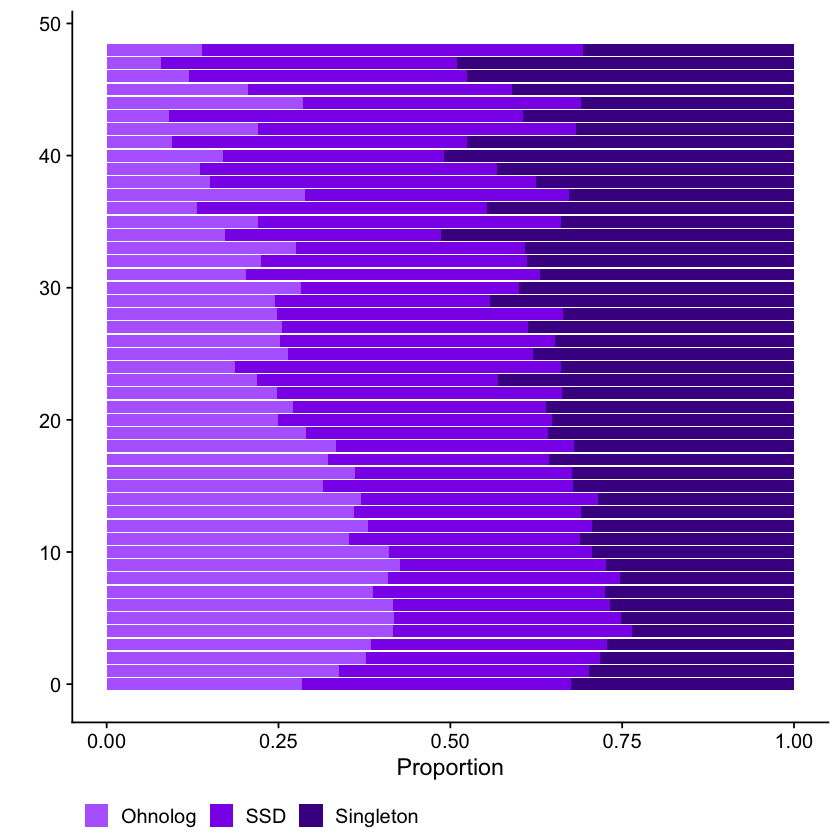

In [21]:
genesWitheQTLTissueCountBonferroni$type2 <- factor(genesWitheQTLTissueCountBonferroni$type, levels = c('ohno', 'SSD', 'singleton'))
ohno_bar_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroni, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = type2),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="") +
    scale_fill_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    theme(legend.position="bottom") + coord_flip()
ohno_bar_bonferroni

##### Metasoft

In [22]:
genesWitheQTLTissueCountMetasoft <- read.csv("../../outputFiles/genesWitheQTLTissueCountMetasoftAndOhnologStatus.csv", sep="\t")
summary(genesWitheQTLTissueCountMetasoft)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:19067       Min.   : 0.00   Min.   : 1.00   
 1st Qu.: 4766   Class :character   1st Qu.:10.00   1st Qu.:46.00   
 Median : 9533   Mode  :character   Median :34.00   Median :48.00   
 Mean   : 9533                      Mean   :28.96   Mean   :41.44   
 3rd Qu.:14300                      3rd Qu.:47.00   3rd Qu.:48.00   
 Max.   :19066                      Max.   :48.00   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:19067       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31743292   1st Qu.: 31804066   1st Qu.:-1.00000  
 Mode  :character   Median : 58328984   Median : 58419584   Median : 1.00000  
                    Mean   : 74432773   Mean   : 74500717   Mean   : 0.01243  
                    3rd Qu.:111205142   3rd Qu.:111303315   3rd Qu.: 1.00000  
                    Max.   :249200395   Max

In [23]:
summary(genesWitheQTLTissueCountMetasoft)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:19067       Min.   : 0.00   Min.   : 1.00   
 1st Qu.: 4766   Class :character   1st Qu.:10.00   1st Qu.:46.00   
 Median : 9533   Mode  :character   Median :34.00   Median :48.00   
 Mean   : 9533                      Mean   :28.96   Mean   :41.44   
 3rd Qu.:14300                      3rd Qu.:47.00   3rd Qu.:48.00   
 Max.   :19066                      Max.   :48.00   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:19067       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31743292   1st Qu.: 31804066   1st Qu.:-1.00000  
 Mode  :character   Median : 58328984   Median : 58419584   Median : 1.00000  
                    Mean   : 74432773   Mean   : 74500717   Mean   : 0.01243  
                    3rd Qu.:111205142   3rd Qu.:111303315   3rd Qu.: 1.00000  
                    Max.   :249200395   Max

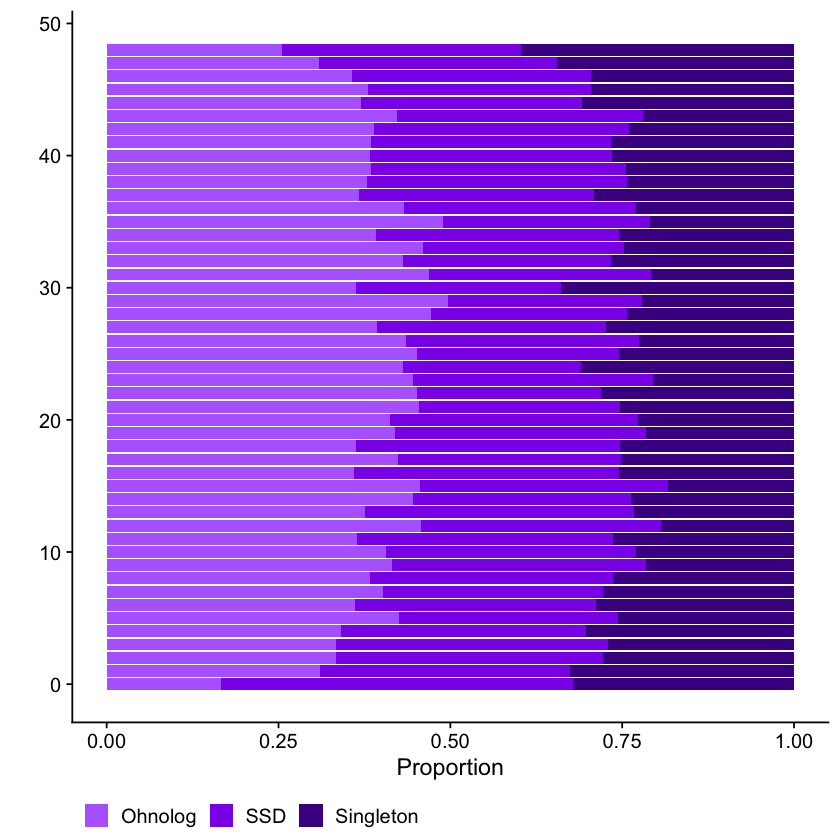

In [24]:
genesWitheQTLTissueCountMetasoft$type2 <- factor(genesWitheQTLTissueCountMetasoft$type, levels = c('ohno', 'SSD', 'singleton'))
ohno_bar_metasoft <- ggplot(genesWitheQTLTissueCountMetasoft, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = type2),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="") +
    scale_fill_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    theme(legend.position="bottom") + coord_flip()
ohno_bar_metasoft

### Proportion of tested tissues affected by eQTLs

#### Exclude genes without any eQTLs

If affected by eQTLs, what proportion of tissues affected

##### Bonferroni-corrected

In [25]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]

In [26]:
summary(genesWitheQTLTissueCountBonferroniWithoutZero)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:15738       Min.   : 1.000   Min.   : 1.00   
 1st Qu.: 3934   Class :character   1st Qu.: 2.000   1st Qu.:47.00   
 Median : 7868   Mode  :character   Median : 5.000   Median :48.00   
 Mean   : 7868                      Mean   : 9.291   Mean   :43.69   
 3rd Qu.:11803                      3rd Qu.:12.000   3rd Qu.:48.00   
 Max.   :15737                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:15738       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31586867   1st Qu.: 31676302   1st Qu.:-1.00000  
 Mode  :character   Median : 58859589   Median : 58900252   Median : 1.00000  
                    Mean   : 74429565   Mean   : 74503440   Mean   : 0.01131  
                    3rd Qu.:111209726   3rd Qu.:111291528   3rd Qu.: 1.00000  
                    Max.   :24914420

In [27]:
nrow(genesWitheQTLTissueCountBonferroniWithoutZero)

[1] 15738

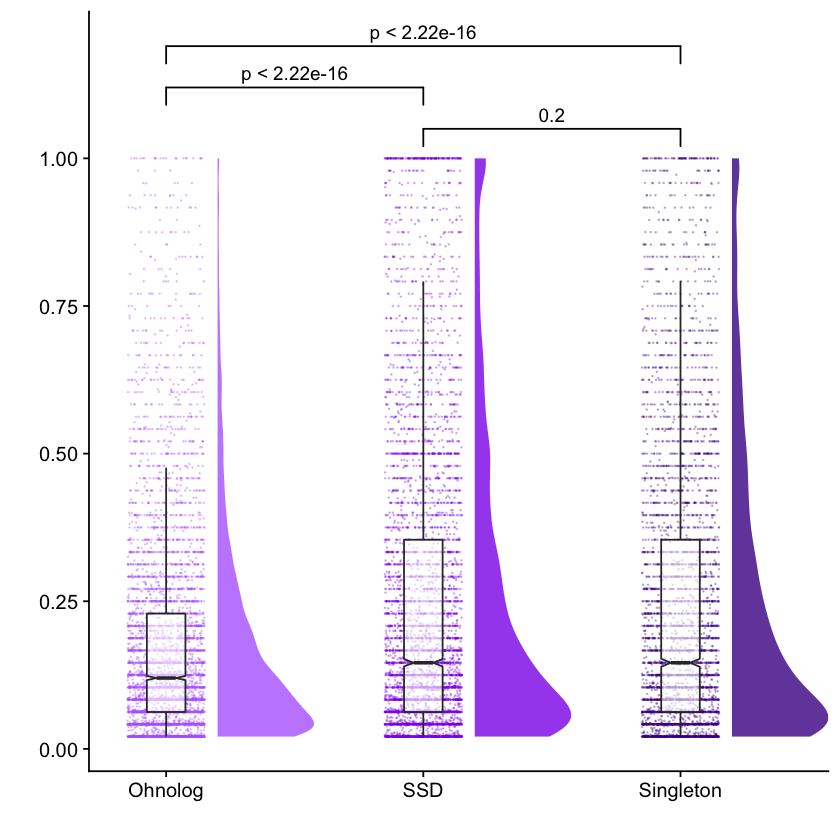

In [28]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]
ohno_raincloud_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroniWithoutZero, aes(type2, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = type2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = type2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    scale_fill_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    theme(legend.position="none") +
    geom_signif(y_position=c(1.19, 1.12, 1.05), comparisons = list(c("ohno", "singleton"), c("ohno", "SSD"), c("SSD", "singleton")),
               textsize=4, test = "wilcox.test")
ohno_raincloud_bonferroni

In [14]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "ohno"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "SSD"), ]$propOfExpressedAffectedByeQTL
W = 13177544, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [15]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.449723e-36

In [16]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "ohno"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "singleton"), ]$propOfExpressedAffectedByeQTL
W = 11415700, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [17]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 4.635086e-27

In [18]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "SSD"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "singleton"), ]$propOfExpressedAffectedByeQTL
W = 12943692, p-value = 0.1978
alternative hypothesis: true location shift is not equal to 0


In [19]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1

In [20]:
tapply(genesWitheQTLTissueCountBonferroniWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountBonferroniWithoutZero$type, summary)

$ohno
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.06250 0.12000 0.17729 0.22917 1.00000 

$singleton
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.06250 0.14583 0.24641 0.35417 1.00000 

$SSD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.06250 0.14583 0.25328 0.35417 1.00000 


In [9]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$expressedTissues,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$expressedTissues) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "ohno"), ]$expressedTissues and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "SSD"), ]$expressedTissues
W = 16406564, p-value = 7.295e-15
alternative hypothesis: true location shift is not equal to 0


In [11]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$expressedTissues,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$expressedTissues) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "ohno"), ]$expressedTissues and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$type == "singleton"), ]$expressedTissues
W = 12324144, p-value = 1.093e-10
alternative hypothesis: true location shift is not equal to 0


In [21]:
wilcoxonR(x = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$type,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$type),
          ci = TRUE)

r      lower.ci upper.ci
1 -0.122 -0.14    -0.104

In [22]:
wilcoxonR(x = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'ohno'),]$type,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$type),
          ci = TRUE)

r      lower.ci upper.ci
1 -0.109 -0.127   -0.0889

In [23]:
wilcoxonR(x = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'SSD'),]$type,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$type == 'singleton'),]$type),
          ci = TRUE)

r       lower.ci upper.ci
1 -0.0128 -0.0319  0.00677

##### Metasoft

In [24]:
genesWitheQTLTissueCountMetasoftWithoutZero <- genesWitheQTLTissueCountMetasoft[ which(genesWitheQTLTissueCountMetasoft$propOfExpressedAffectedByeQTL > 0),]

In [25]:
summary(genesWitheQTLTissueCountMetasoftWithoutZero)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:17867       Min.   : 1.0    Min.   : 2.00   
 1st Qu.: 4466   Class :character   1st Qu.:15.0    1st Qu.:47.00   
 Median : 8933   Mode  :character   Median :37.0    Median :48.00   
 Mean   : 8933                      Mean   :30.9    Mean   :43.62   
 3rd Qu.:13400                      3rd Qu.:47.0    3rd Qu.:48.00   
 Max.   :17866                      Max.   :48.0    Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:17867       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31797803   1st Qu.: 31885948   1st Qu.:-1.00000  
 Mode  :character   Median : 58699013   Median : 58788815   Median : 1.00000  
                    Mean   : 74461356   Mean   : 74532422   Mean   : 0.01147  
                    3rd Qu.:110962580   3rd Qu.:111041461   3rd Qu.: 1.00000  
                    Max.   :249200395   Max

In [26]:
nrow(genesWitheQTLTissueCountMetasoftWithoutZero)

[1] 17867

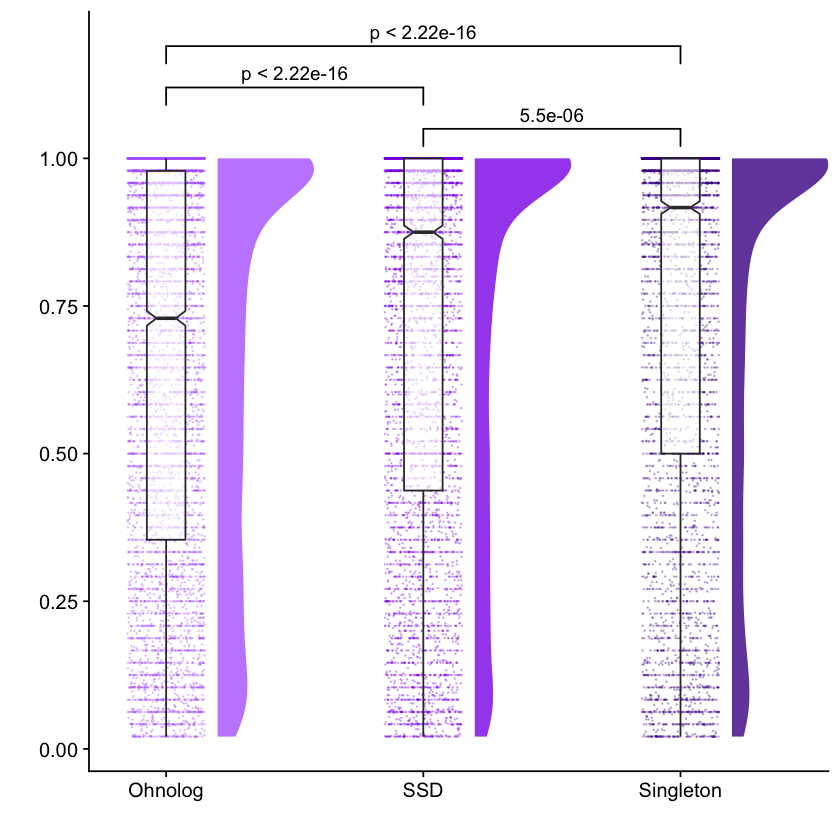

In [27]:
genesWitheQTLTissueCountMetasoftWithoutZero <- genesWitheQTLTissueCountMetasoft[ which(genesWitheQTLTissueCountMetasoftWithoutZero$propOfExpressedAffectedByeQTL > 0),]
ohno_raincloud_metasoft <- ggplot(genesWitheQTLTissueCountMetasoftWithoutZero, aes(type2, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = type2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = type2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    scale_fill_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    theme(legend.position="none") +
    geom_signif(y_position=c(1.19, 1.12, 1.05), comparisons = list(c("ohno", "singleton"), c("ohno", "SSD"), c("SSD", "singleton")),
               textsize=4, test = "wilcox.test")
ohno_raincloud_metasoft

In [28]:
w <- wilcox.test(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$type == "ohno"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$type == "SSD"), ]$propOfExpressedAffectedByeQTL
W = 16880994, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [29]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 7.407518e-40

In [30]:
w <- wilcox.test(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$type == "ohno"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$type == "singleton"), ]$propOfExpressedAffectedByeQTL
W = 13847103, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [31]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.2862e-67

In [32]:
w <- wilcox.test(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$type == "SSD"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$type == "singleton"), ]$propOfExpressedAffectedByeQTL
W = 15703900, p-value = 5.472e-06
alternative hypothesis: true location shift is not equal to 0


In [33]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 7.66086e-05

In [34]:
tapply(genesWitheQTLTissueCountMetasoftWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountMetasoftWithoutZero$type, summary)

$ohno
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.35417 0.72917 0.64755 0.97872 1.00000 

$singleton
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.50000 0.91667 0.73281 1.00000 1.00000 

$SSD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.43750 0.87500 0.71088 1.00000 1.00000 


In [35]:
wilcoxonR(x = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'ohno'),]$type,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'SSD'),]$type),
          ci = TRUE)

r     lower.ci upper.ci
1 -0.12 -0.137   -0.102

In [36]:
wilcoxonR(x = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'ohno'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'ohno'),]$type,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'singleton'),]$type),
          ci = TRUE)

r      lower.ci upper.ci
1 -0.162 -0.179   -0.143

In [37]:
wilcoxonR(x = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'SSD'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'singleton'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'SSD'),]$type,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$type == 'singleton'),]$type),
          ci = TRUE)

r      lower.ci upper.ci
1 0.0424 0.0245   0.061

## CNVRs (Zarrei et. al CNV map)

### Proportion for number of tissues affected by eQTLs

##### Bonferroni-corrected

In [92]:
genesWitheQTLTissueCountBonferroni <- read.csv("../../outputFiles/genesWitheQTLTissueCountBonferroniAndCNVZarreiStatus.csv", sep="\t")
summary(genesWitheQTLTissueCountBonferroni)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:19067       Min.   : 0.000   Min.   : 1.00   
 1st Qu.: 4766   Class :character   1st Qu.: 1.000   1st Qu.:46.00   
 Median : 9533   Mode  :character   Median : 4.000   Median :48.00   
 Mean   : 9533                      Mean   : 7.669   Mean   :41.44   
 3rd Qu.:14300                      3rd Qu.:10.000   3rd Qu.:48.00   
 Max.   :19066                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:19067       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31743292   1st Qu.: 31804066   1st Qu.:-1.00000  
 Mode  :character   Median : 58328984   Median : 58419584   Median : 1.00000  
                    Mean   : 74432773   Mean   : 74500717   Mean   : 0.01243  
                    3rd Qu.:111205142   3rd Qu.:111303315   3rd Qu.: 1.00000  
                    Max.   :24920039

In [93]:
genesWitheQTLTissueCountBonferroni$affected <- 'N'
genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$affectedTissues > 0),]$affected <- 'Y'

In [94]:
summary(genesWitheQTLTissueCountBonferroni)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:19067       Min.   : 0.000   Min.   : 1.00   
 1st Qu.: 4766   Class :character   1st Qu.: 1.000   1st Qu.:46.00   
 Median : 9533   Mode  :character   Median : 4.000   Median :48.00   
 Mean   : 9533                      Mean   : 7.669   Mean   :41.44   
 3rd Qu.:14300                      3rd Qu.:10.000   3rd Qu.:48.00   
 Max.   :19066                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:19067       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31743292   1st Qu.: 31804066   1st Qu.:-1.00000  
 Mode  :character   Median : 58328984   Median : 58419584   Median : 1.00000  
                    Mean   : 74432773   Mean   : 74500717   Mean   : 0.01243  
                    3rd Qu.:111205142   3rd Qu.:111303315   3rd Qu.: 1.00000  
                    Max.   :24920039

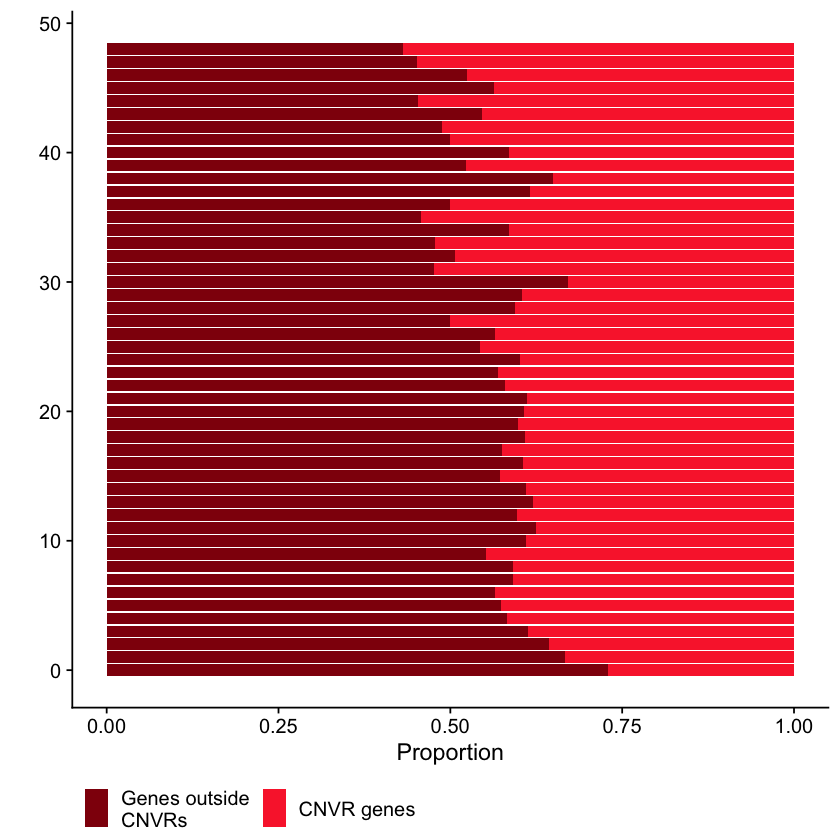

In [97]:
genesWitheQTLTissueCountBonferroni$CNV2 <- factor(genesWitheQTLTissueCountBonferroni$CNV, levels = c('N', 'Y'))
zarrei_bar_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroni, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = CNV2),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="") +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    theme(legend.position="bottom") + coord_flip()
zarrei_bar_bonferroni

##### Metasoft

In [34]:
genesWitheQTLTissueCountMetasoft <- read.csv("../../outputFiles/genesWitheQTLTissueCountMetasoftAndCNVZarreiStatus.csv", sep="\t")
summary(genesWitheQTLTissueCountMetasoft)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:19067       Min.   : 0.00   Min.   : 1.00   
 1st Qu.: 4766   Class :character   1st Qu.:10.00   1st Qu.:46.00   
 Median : 9533   Mode  :character   Median :34.00   Median :48.00   
 Mean   : 9533                      Mean   :28.96   Mean   :41.44   
 3rd Qu.:14300                      3rd Qu.:47.00   3rd Qu.:48.00   
 Max.   :19066                      Max.   :48.00   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:19067       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31743292   1st Qu.: 31804066   1st Qu.:-1.00000  
 Mode  :character   Median : 58328984   Median : 58419584   Median : 1.00000  
                    Mean   : 74432773   Mean   : 74500717   Mean   : 0.01243  
                    3rd Qu.:111205142   3rd Qu.:111303315   3rd Qu.: 1.00000  
                    Max.   :249200395   Max

In [35]:
summary(genesWitheQTLTissueCountMetasoft)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:19067       Min.   : 0.00   Min.   : 1.00   
 1st Qu.: 4766   Class :character   1st Qu.:10.00   1st Qu.:46.00   
 Median : 9533   Mode  :character   Median :34.00   Median :48.00   
 Mean   : 9533                      Mean   :28.96   Mean   :41.44   
 3rd Qu.:14300                      3rd Qu.:47.00   3rd Qu.:48.00   
 Max.   :19066                      Max.   :48.00   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:19067       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31743292   1st Qu.: 31804066   1st Qu.:-1.00000  
 Mode  :character   Median : 58328984   Median : 58419584   Median : 1.00000  
                    Mean   : 74432773   Mean   : 74500717   Mean   : 0.01243  
                    3rd Qu.:111205142   3rd Qu.:111303315   3rd Qu.: 1.00000  
                    Max.   :249200395   Max

In [ ]:
genesWitheQTLTissueCountMetasoft$CNV2 <- factor(genesWitheQTLTissueCountMetasoft$CNV, levels = c('N', 'Y'))
zarrei_bar_metasoft <- ggplot(genesWitheQTLTissueCountMetasoft, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = CNV2),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="") +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    theme(legend.position="bottom") + coord_flip()
zarrei_bar_metasoft

### Proportion of tested tissues affected by eQTLs

#### Exclude genes without any eQTLs

If affected by eQTLs, what proportion of tissues affected

##### Bonferroni-corrected

In [37]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]

In [38]:
summary(genesWitheQTLTissueCountBonferroniWithoutZero)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:15738       Min.   : 1.000   Min.   : 1.00   
 1st Qu.: 3934   Class :character   1st Qu.: 2.000   1st Qu.:47.00   
 Median : 7868   Mode  :character   Median : 5.000   Median :48.00   
 Mean   : 7868                      Mean   : 9.291   Mean   :43.69   
 3rd Qu.:11803                      3rd Qu.:12.000   3rd Qu.:48.00   
 Max.   :15737                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:15738       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31586867   1st Qu.: 31676302   1st Qu.:-1.00000  
 Mode  :character   Median : 58859589   Median : 58900252   Median : 1.00000  
                    Mean   : 74429565   Mean   : 74503440   Mean   : 0.01131  
                    3rd Qu.:111209726   3rd Qu.:111291528   3rd Qu.: 1.00000  
                    Max.   :24914420

In [39]:
nrow(genesWitheQTLTissueCountBonferroniWithoutZero)

[1] 15738

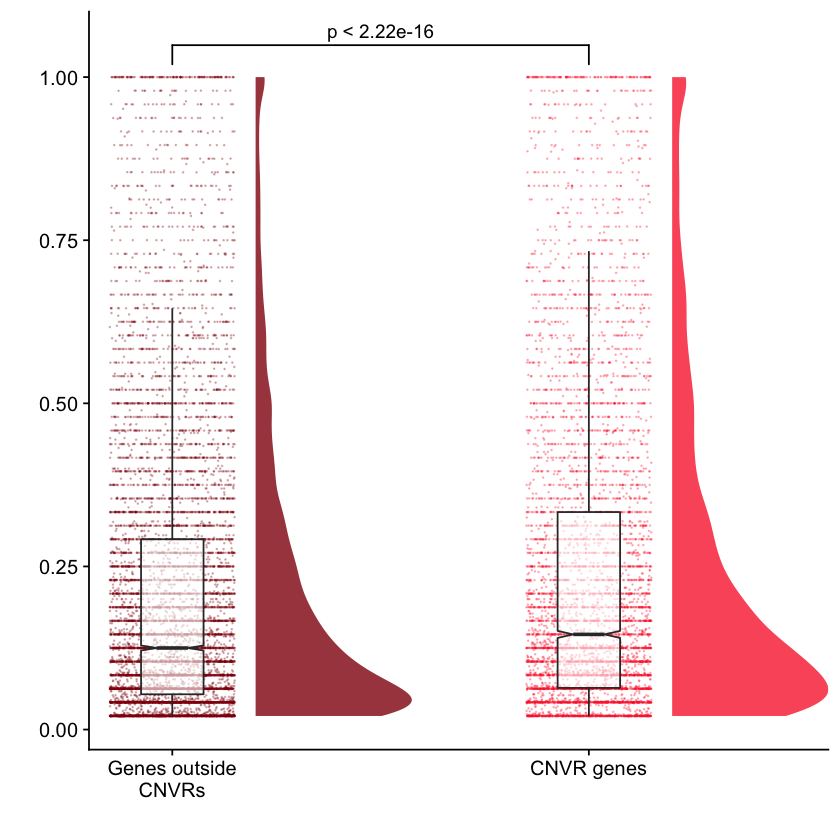

In [40]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]
zarrei_raincloud_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroniWithoutZero, aes(CNV2, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
zarrei_raincloud_bonferroni

In [49]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'N'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == "Y"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == "N"), ]$propOfExpressedAffectedByeQTL
W = 32204790, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [50]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.261752e-19

In [98]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$CNV2 == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$CNV2 == 'N'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroni[which(genesWitheQTLTissueCountBonferroni$CNV2 == "Y"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroni[which(genesWitheQTLTissueCountBonferroni$CNV2 == "N"), ]$propOfExpressedAffectedByeQTL
W = 48392274, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [99]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 3.138826e-56

In [51]:
tapply(genesWitheQTLTissueCountBonferroniWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountBonferroniWithoutZero$CNV2, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.05405 0.12500 0.21218 0.29167 1.00000 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.06383 0.14583 0.24256 0.33333 1.00000 


In [52]:
wilcoxonR(x = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'N'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'Y'),]$CNV2,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'N'),]$CNV2),
          ci = TRUE)

r       lower.ci upper.ci
1 -0.0745 -0.0893  -0.0591

##### Metasoft

In [53]:
genesWitheQTLTissueCountMetasoftWithoutZero <- genesWitheQTLTissueCountMetasoft[ which(genesWitheQTLTissueCountMetasoft$propOfExpressedAffectedByeQTL > 0),]

In [54]:
summary(genesWitheQTLTissueCountMetasoftWithoutZero)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:17867       Min.   : 1.0    Min.   : 2.00   
 1st Qu.: 4466   Class :character   1st Qu.:15.0    1st Qu.:47.00   
 Median : 8933   Mode  :character   Median :37.0    Median :48.00   
 Mean   : 8933                      Mean   :30.9    Mean   :43.62   
 3rd Qu.:13400                      3rd Qu.:47.0    3rd Qu.:48.00   
 Max.   :17866                      Max.   :48.0    Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand        
 Length:17867       Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 Class :character   1st Qu.: 31797803   1st Qu.: 31885948   1st Qu.:-1.00000  
 Mode  :character   Median : 58699013   Median : 58788815   Median : 1.00000  
                    Mean   : 74461356   Mean   : 74532422   Mean   : 0.01147  
                    3rd Qu.:110962580   3rd Qu.:111041461   3rd Qu.: 1.00000  
                    Max.   :249200395   Max

In [55]:
nrow(genesWitheQTLTissueCountMetasoftWithoutZero)

[1] 17867

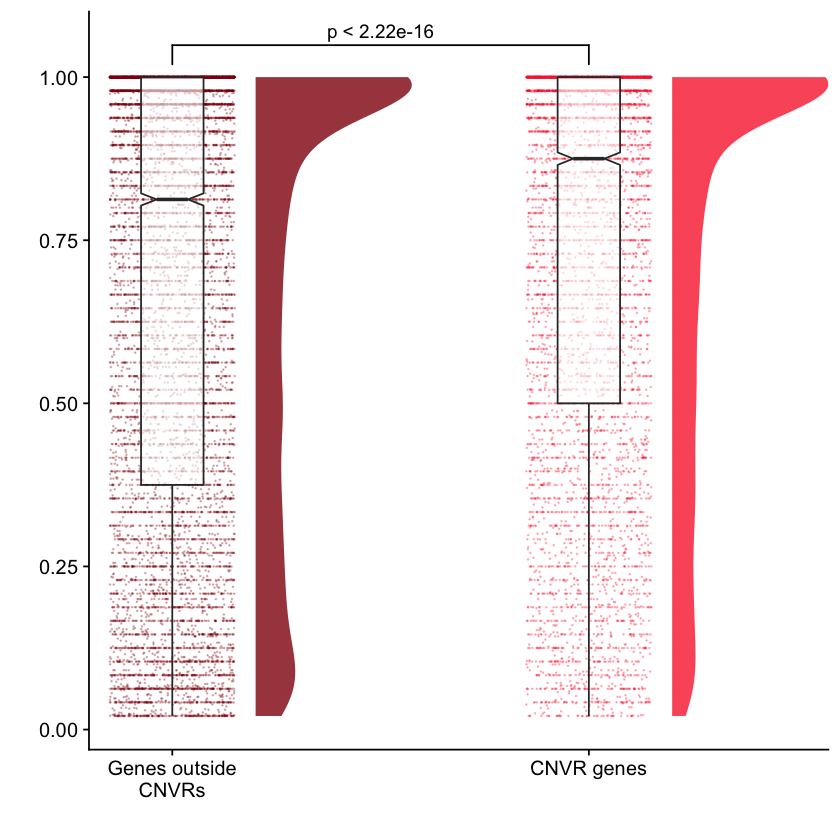

In [56]:
genesWitheQTLTissueCountMetasoftWithoutZero <- genesWitheQTLTissueCountMetasoft[ which(genesWitheQTLTissueCountMetasoft$propOfExpressedAffectedByeQTL > 0),]
zarrei_raincloud_metasoft <- ggplot(genesWitheQTLTissueCountMetasoftWithoutZero, aes(CNV2, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
zarrei_raincloud_metasoft

In [57]:
w <- wilcox.test(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'N'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == "Y"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == "N"), ]$propOfExpressedAffectedByeQTL
W = 40776872, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [58]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 3.023076e-21

In [59]:
tapply(genesWitheQTLTissueCountMetasoftWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountMetasoftWithoutZero$CNV2, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.37500 0.81250 0.67494 1.00000 1.00000 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.50000 0.87500 0.72773 1.00000 1.00000 


In [60]:
wilcoxonR(x = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'N'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'Y'),]$CNV2,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'N'),]$CNV2),
          ci = TRUE)

r       lower.ci upper.ci
1 -0.0728 -0.0868  -0.059

## CNVRs (ExAC CNV data)

### Proportion for number of tissues affected by eQTLs

##### Bonferroni-corrected

In [100]:
genesWitheQTLTissueCountBonferroni <- read.csv("../../outputFiles/genesWitheQTLTissueCountBonferroniAndCNVExACStatus.csv", sep="\t")
summary(genesWitheQTLTissueCountBonferroni)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:15150       Min.   : 0.000   Min.   : 1      
 1st Qu.: 3787   Class :character   1st Qu.: 1.000   1st Qu.:47      
 Median : 7574   Mode  :character   Median : 4.000   Median :48      
 Mean   : 7574                      Mean   : 7.705   Mean   :43      
 3rd Qu.:11362                      3rd Qu.:10.000   3rd Qu.:48      
 Max.   :15149                      Max.   :48.000   Max.   :48      
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   : 1.000   Min.   :    38814   Min.   :    46870   Min.   :-1.000000  
 1st Qu.: 4.000   1st Qu.: 32553918   1st Qu.: 32617152   1st Qu.:-1.000000  
 Median : 9.000   Median : 58707320   Median : 58857424   Median : 1.000000  
 Mean   : 9.711   Mean   : 74994357   Mean   : 75066462   Mean   : 0.004356  
 3rd Qu.:16.000   3rd Qu.:111764211   3rd Qu.:111836079   3rd Qu.: 1.000000  
 Max.   :22.000   Max.   :249200395   Max.

In [101]:
genesWitheQTLTissueCountBonferroni$affected <- 'N'
genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$affectedTissues > 0),]$affected <- 'Y'

In [102]:
summary(genesWitheQTLTissueCountBonferroni)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:15150       Min.   : 0.000   Min.   : 1      
 1st Qu.: 3787   Class :character   1st Qu.: 1.000   1st Qu.:47      
 Median : 7574   Mode  :character   Median : 4.000   Median :48      
 Mean   : 7574                      Mean   : 7.705   Mean   :43      
 3rd Qu.:11362                      3rd Qu.:10.000   3rd Qu.:48      
 Max.   :15149                      Max.   :48.000   Max.   :48      
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   : 1.000   Min.   :    38814   Min.   :    46870   Min.   :-1.000000  
 1st Qu.: 4.000   1st Qu.: 32553918   1st Qu.: 32617152   1st Qu.:-1.000000  
 Median : 9.000   Median : 58707320   Median : 58857424   Median : 1.000000  
 Mean   : 9.711   Mean   : 74994357   Mean   : 75066462   Mean   : 0.004356  
 3rd Qu.:16.000   3rd Qu.:111764211   3rd Qu.:111836079   3rd Qu.: 1.000000  
 Max.   :22.000   Max.   :249200395   Max.

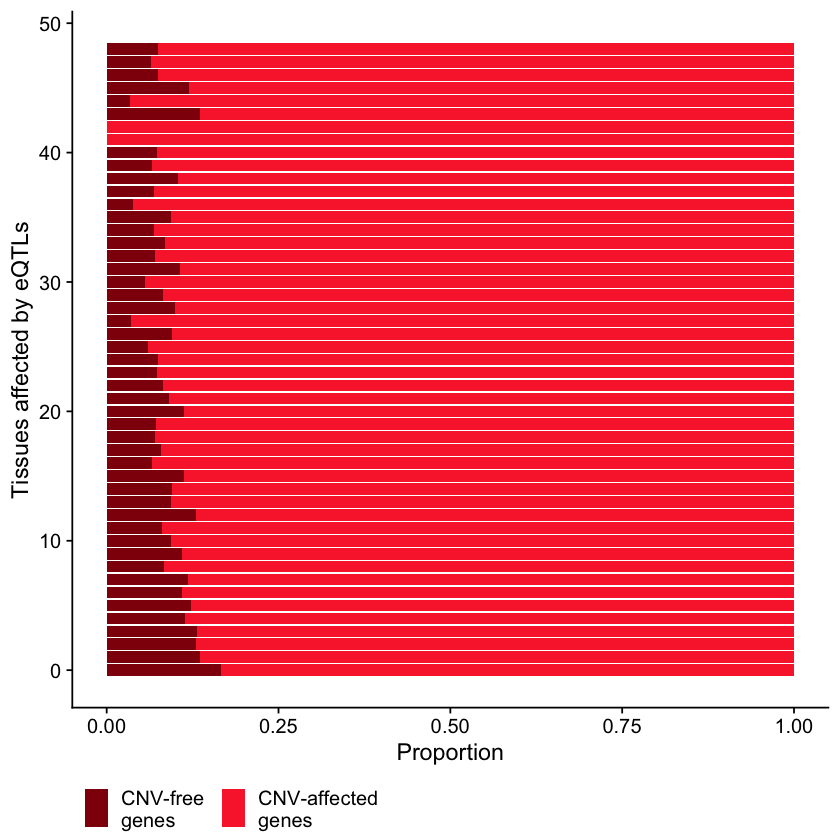

In [103]:
genesWitheQTLTissueCountBonferroni$CNV2 <- factor(genesWitheQTLTissueCountBonferroni$CNV, levels = c('N', 'Y'))
exac_bar_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroni, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = CNV2),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="Tissues affected by eQTLs") +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    theme(legend.position="bottom") + coord_flip()
exac_bar_bonferroni

##### Metasoft

In [46]:
genesWitheQTLTissueCountMetasoft <- read.csv("../../outputFiles/genesWitheQTLTissueCountMetasoftAndCNVExACStatus.csv", sep="\t")
summary(genesWitheQTLTissueCountMetasoft)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:15150       Min.   : 0.00   Min.   : 1      
 1st Qu.: 3787   Class :character   1st Qu.:13.00   1st Qu.:47      
 Median : 7574   Mode  :character   Median :36.00   Median :48      
 Mean   : 7574                      Mean   :30.01   Mean   :43      
 3rd Qu.:11362                      3rd Qu.:47.00   3rd Qu.:48      
 Max.   :15149                      Max.   :48.00   Max.   :48      
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   : 1.000   Min.   :    38814   Min.   :    46870   Min.   :-1.000000  
 1st Qu.: 4.000   1st Qu.: 32553918   1st Qu.: 32617152   1st Qu.:-1.000000  
 Median : 9.000   Median : 58707320   Median : 58857424   Median : 1.000000  
 Mean   : 9.711   Mean   : 74994357   Mean   : 75066462   Mean   : 0.004356  
 3rd Qu.:16.000   3rd Qu.:111764211   3rd Qu.:111836079   3rd Qu.: 1.000000  
 Max.   :22.000   Max.   :249200395   Max.   :249

In [47]:
summary(genesWitheQTLTissueCountMetasoft)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:15150       Min.   : 0.00   Min.   : 1      
 1st Qu.: 3787   Class :character   1st Qu.:13.00   1st Qu.:47      
 Median : 7574   Mode  :character   Median :36.00   Median :48      
 Mean   : 7574                      Mean   :30.01   Mean   :43      
 3rd Qu.:11362                      3rd Qu.:47.00   3rd Qu.:48      
 Max.   :15149                      Max.   :48.00   Max.   :48      
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   : 1.000   Min.   :    38814   Min.   :    46870   Min.   :-1.000000  
 1st Qu.: 4.000   1st Qu.: 32553918   1st Qu.: 32617152   1st Qu.:-1.000000  
 Median : 9.000   Median : 58707320   Median : 58857424   Median : 1.000000  
 Mean   : 9.711   Mean   : 74994357   Mean   : 75066462   Mean   : 0.004356  
 3rd Qu.:16.000   3rd Qu.:111764211   3rd Qu.:111836079   3rd Qu.: 1.000000  
 Max.   :22.000   Max.   :249200395   Max.   :249

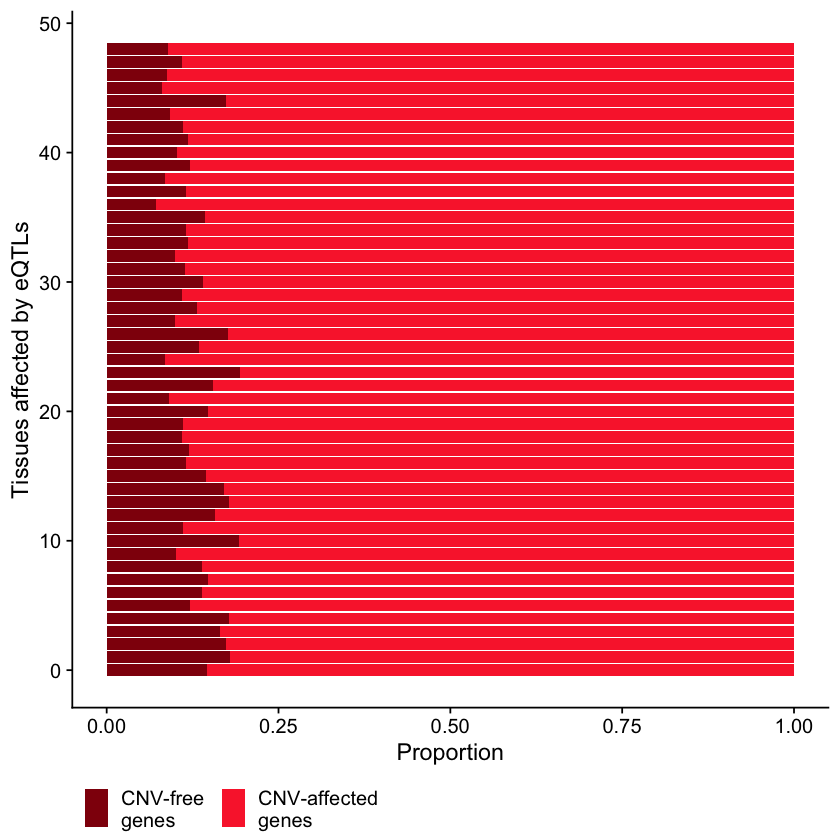

In [48]:
genesWitheQTLTissueCountMetasoft$CNV2 <- factor(genesWitheQTLTissueCountMetasoft$CNV, levels = c('N', 'Y'))
exac_bar_metasoft <- ggplot(genesWitheQTLTissueCountMetasoft, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = CNV2),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="Tissues affected by eQTLs") +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    theme(legend.position="bottom") + coord_flip()
exac_bar_metasoft

### Proportion of tested tissues affected by eQTLs

#### Exclude genes without any eQTLs

If affected by eQTLs, what proportion of tissues affected

##### Bonferroni-corrected

In [49]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]

In [50]:
summary(genesWitheQTLTissueCountBonferroniWithoutZero)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:12757       Min.   : 1.000   Min.   : 1.00   
 1st Qu.: 3189   Class :character   1st Qu.: 2.000   1st Qu.:48.00   
 Median : 6378   Mode  :character   Median : 5.000   Median :48.00   
 Mean   : 6378                      Mean   : 9.151   Mean   :44.65   
 3rd Qu.: 9567                      3rd Qu.:12.000   3rd Qu.:48.00   
 Max.   :12756                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name Gene.Start..bp.     Gene.End..bp.           Strand        
 Min.   : 1.00   Min.   :    38814   Min.   :    46870   Min.   :-1.00000  
 1st Qu.: 4.00   1st Qu.: 32384618   1st Qu.: 32490923   1st Qu.:-1.00000  
 Median : 9.00   Median : 59951278   Median : 60058516   Median : 1.00000  
 Mean   : 9.69   Mean   : 75047023   Mean   : 75124881   Mean   : 0.00196  
 3rd Qu.:15.00   3rd Qu.:111839688   3rd Qu.:111895323   3rd Qu.: 1.00000  
 Max.   :22.00   Max.   :249144205   Max.   :249153343

In [51]:
nrow(genesWitheQTLTissueCountBonferroniWithoutZero)

[1] 12757

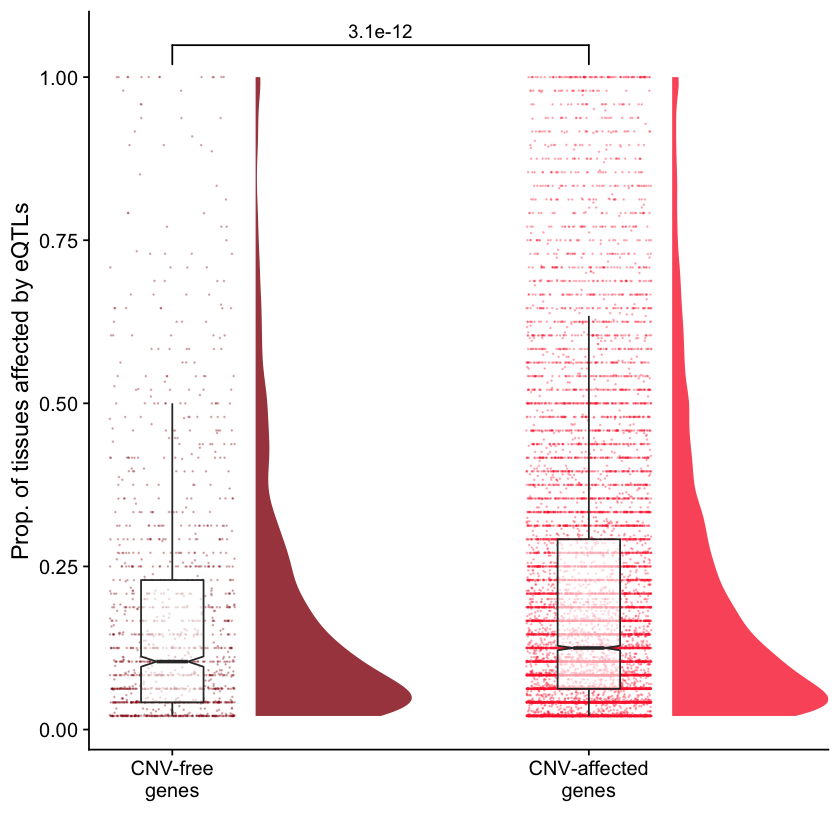

In [52]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]
exac_raincloud_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroniWithoutZero, aes(CNV2, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="Prop. of tissues affected by eQTLs", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
exac_raincloud_bonferroni

In [72]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'N'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == "Y"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == "N"), ]$propOfExpressedAffectedByeQTL
W = 8939790, p-value = 3.055e-12
alternative hypothesis: true location shift is not equal to 0


In [73]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 4.277148e-11

In [74]:
tapply(genesWitheQTLTissueCountBonferroniWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountBonferroniWithoutZero$CNV2, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.04167 0.10417 0.17548 0.22917 1.00000 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.06250 0.12500 0.21436 0.29167 1.00000 


In [75]:
wilcoxonR(x = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'N'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'Y'),]$CNV2,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CNV2 == 'N'),]$CNV2),
          ci = TRUE)

r       lower.ci upper.ci
1 -0.0618 -0.079   -0.0451

##### Metasoft

In [76]:
genesWitheQTLTissueCountMetasoftWithoutZero <- genesWitheQTLTissueCountMetasoft[ which(genesWitheQTLTissueCountMetasoft$propOfExpressedAffectedByeQTL > 0),]

In [77]:
summary(genesWitheQTLTissueCountMetasoftWithoutZero)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:14485       Min.   : 1.00   Min.   : 2.00   
 1st Qu.: 3621   Class :character   1st Qu.:16.00   1st Qu.:48.00   
 Median : 7242   Mode  :character   Median :38.00   Median :48.00   
 Mean   : 7242                      Mean   :31.38   Mean   :44.46   
 3rd Qu.:10863                      3rd Qu.:47.00   3rd Qu.:48.00   
 Max.   :14484                      Max.   :48.00   Max.   :48.00   
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   : 1.000   Min.   :    38814   Min.   :    46870   Min.   :-1.000000  
 1st Qu.: 4.000   1st Qu.: 32645287   1st Qu.: 32697205   1st Qu.:-1.000000  
 Median : 9.000   Median : 59157374   Median : 59314303   Median : 1.000000  
 Mean   : 9.689   Mean   : 75112671   Mean   : 75187015   Mean   : 0.003935  
 3rd Qu.:16.000   3rd Qu.:111743393   3rd Qu.:111789574   3rd Qu.: 1.000000  
 Max.   :22.000   Max.   :249200395   Max.   :249

In [78]:
nrow(genesWitheQTLTissueCountMetasoftWithoutZero)

[1] 14485

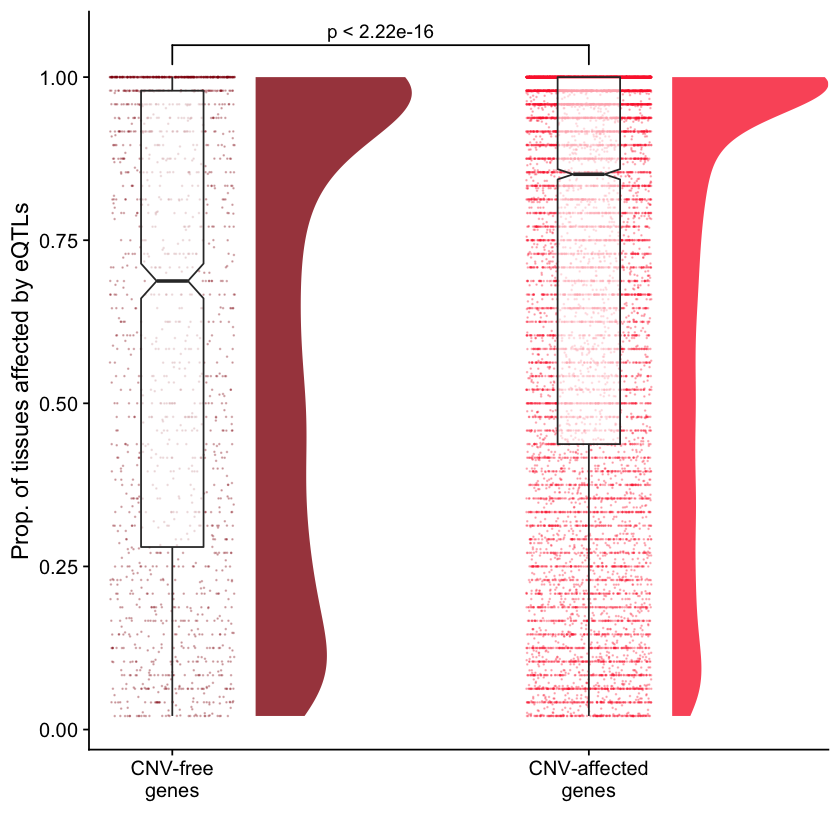

In [79]:
genesWitheQTLTissueCountMetasoftWithoutZero <- genesWitheQTLTissueCountMetasoft[ which(genesWitheQTLTissueCountMetasoft$propOfExpressedAffectedByeQTL > 0),]
exac_raincloud_metasoft <- ggplot(genesWitheQTLTissueCountMetasoftWithoutZero, aes(CNV2, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="Prop. of tissues affected by eQTLs", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
exac_raincloud_metasoft

In [80]:
w <- wilcox.test(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'N'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == "Y"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == "N"), ]$propOfExpressedAffectedByeQTL
W = 12533546, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [81]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.373182e-21

In [82]:
tapply(genesWitheQTLTissueCountMetasoftWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountMetasoftWithoutZero$CNV2, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.27977 0.68750 0.61820 0.97917 1.00000 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.43750 0.85106 0.70254 1.00000 1.00000 


In [83]:
wilcoxonR(x = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'N'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'Y'),]$CNV2,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CNV2 == 'N'),]$CNV2),
          ci = TRUE)

r       lower.ci upper.ci
1 -0.0815 -0.098   -0.0652

## Haploinsufficient genes

### Proportion for number of tissues affected by eQTLs

##### Bonferroni-corrected

In [106]:
genesWitheQTLTissueCountBonferroni <- read.csv("../../outputFiles/genesWitheQTLTissueCountBonferroniAndHaploStatus.csv", sep="\t")
summary(genesWitheQTLTissueCountBonferroni)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:17045       Min.   : 0.000   Min.   : 1.0    
 1st Qu.: 4261   Class :character   1st Qu.: 1.000   1st Qu.:47.0    
 Median : 8522   Mode  :character   Median : 4.000   Median :48.0    
 Mean   : 8522                      Mean   : 7.881   Mean   :42.5    
 3rd Qu.:12783                      3rd Qu.:11.000   3rd Qu.:48.0    
 Max.   :17044                      Max.   :48.000   Max.   :48.0    
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand       
 Min.   : 1.000   Min.   :     5810   Min.   :    31427   Min.   :-1.0000  
 1st Qu.: 4.000   1st Qu.: 31730576   1st Qu.: 31783437   1st Qu.:-1.0000  
 Median :10.000   Median : 58152564   Median : 58190520   Median : 1.0000  
 Mean   : 9.828   Mean   : 74468419   Mean   : 74538732   Mean   : 0.0044  
 3rd Qu.:16.000   3rd Qu.:111222977   3rd Qu.:111314290   3rd Qu.: 1.0000  
 Max.   :22.000   Max.   :249200395   Max.   :24921414

In [107]:
genesWitheQTLTissueCountBonferroni$affected <- 'N'
genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$affectedTissues > 0),]$affected <- 'Y'

In [108]:
summary(genesWitheQTLTissueCountBonferroni)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:17045       Min.   : 0.000   Min.   : 1.0    
 1st Qu.: 4261   Class :character   1st Qu.: 1.000   1st Qu.:47.0    
 Median : 8522   Mode  :character   Median : 4.000   Median :48.0    
 Mean   : 8522                      Mean   : 7.881   Mean   :42.5    
 3rd Qu.:12783                      3rd Qu.:11.000   3rd Qu.:48.0    
 Max.   :17044                      Max.   :48.000   Max.   :48.0    
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand       
 Min.   : 1.000   Min.   :     5810   Min.   :    31427   Min.   :-1.0000  
 1st Qu.: 4.000   1st Qu.: 31730576   1st Qu.: 31783437   1st Qu.:-1.0000  
 Median :10.000   Median : 58152564   Median : 58190520   Median : 1.0000  
 Mean   : 9.828   Mean   : 74468419   Mean   : 74538732   Mean   : 0.0044  
 3rd Qu.:16.000   3rd Qu.:111222977   3rd Qu.:111314290   3rd Qu.: 1.0000  
 Max.   :22.000   Max.   :249200395   Max.   :24921414

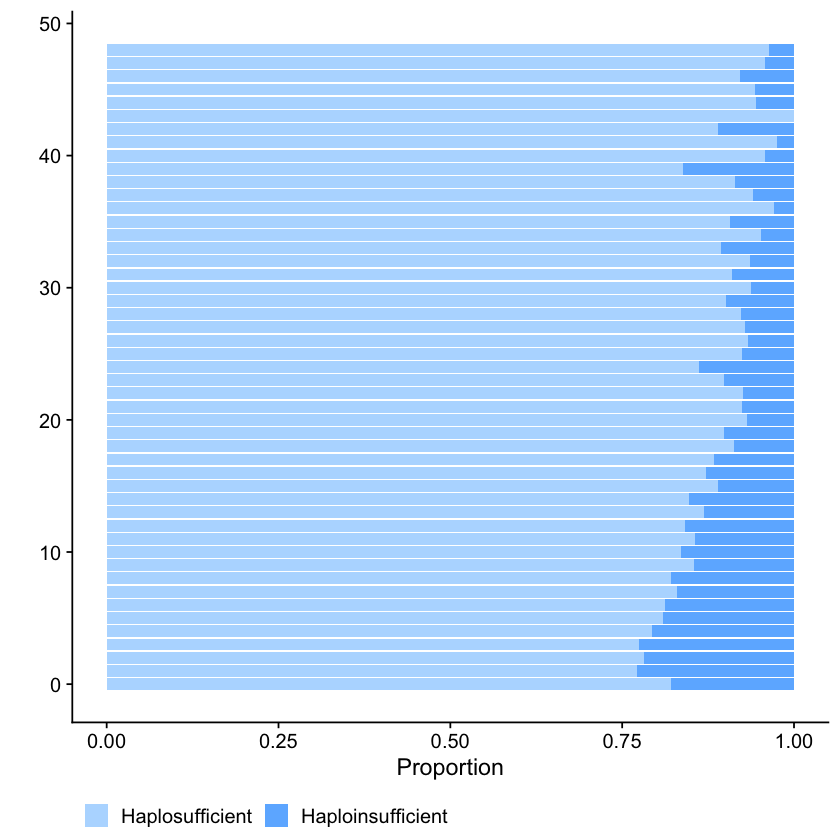

In [58]:
haplo_bar_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroni, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = haplo),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="") +
    scale_fill_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        breaks=c("N", "Y"),
        labels=c("Haplosufficient", "Haploinsufficient")) +
    theme(legend.position="bottom") + coord_flip()
haplo_bar_bonferroni

##### Metasoft

In [59]:
genesWitheQTLTissueCountMetasoft <- read.csv("../../outputFiles/genesWitheQTLTissueCountMetasoftAndHaploStatus.csv", sep="\t")
summary(genesWitheQTLTissueCountMetasoft)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:17045       Min.   : 0.00   Min.   : 1.0    
 1st Qu.: 4261   Class :character   1st Qu.:12.00   1st Qu.:47.0    
 Median : 8522   Mode  :character   Median :36.00   Median :48.0    
 Mean   : 8522                      Mean   :29.93   Mean   :42.5    
 3rd Qu.:12783                      3rd Qu.:47.00   3rd Qu.:48.0    
 Max.   :17044                      Max.   :48.00   Max.   :48.0    
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand       
 Min.   : 1.000   Min.   :     5810   Min.   :    31427   Min.   :-1.0000  
 1st Qu.: 4.000   1st Qu.: 31730576   1st Qu.: 31783437   1st Qu.:-1.0000  
 Median :10.000   Median : 58152564   Median : 58190520   Median : 1.0000  
 Mean   : 9.828   Mean   : 74468419   Mean   : 74538732   Mean   : 0.0044  
 3rd Qu.:16.000   3rd Qu.:111222977   3rd Qu.:111314290   3rd Qu.: 1.0000  
 Max.   :22.000   Max.   :249200395   Max.   :249214145   Max

In [60]:
summary(genesWitheQTLTissueCountMetasoft)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:17045       Min.   : 0.00   Min.   : 1.0    
 1st Qu.: 4261   Class :character   1st Qu.:12.00   1st Qu.:47.0    
 Median : 8522   Mode  :character   Median :36.00   Median :48.0    
 Mean   : 8522                      Mean   :29.93   Mean   :42.5    
 3rd Qu.:12783                      3rd Qu.:47.00   3rd Qu.:48.0    
 Max.   :17044                      Max.   :48.00   Max.   :48.0    
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand       
 Min.   : 1.000   Min.   :     5810   Min.   :    31427   Min.   :-1.0000  
 1st Qu.: 4.000   1st Qu.: 31730576   1st Qu.: 31783437   1st Qu.:-1.0000  
 Median :10.000   Median : 58152564   Median : 58190520   Median : 1.0000  
 Mean   : 9.828   Mean   : 74468419   Mean   : 74538732   Mean   : 0.0044  
 3rd Qu.:16.000   3rd Qu.:111222977   3rd Qu.:111314290   3rd Qu.: 1.0000  
 Max.   :22.000   Max.   :249200395   Max.   :249214145   Max

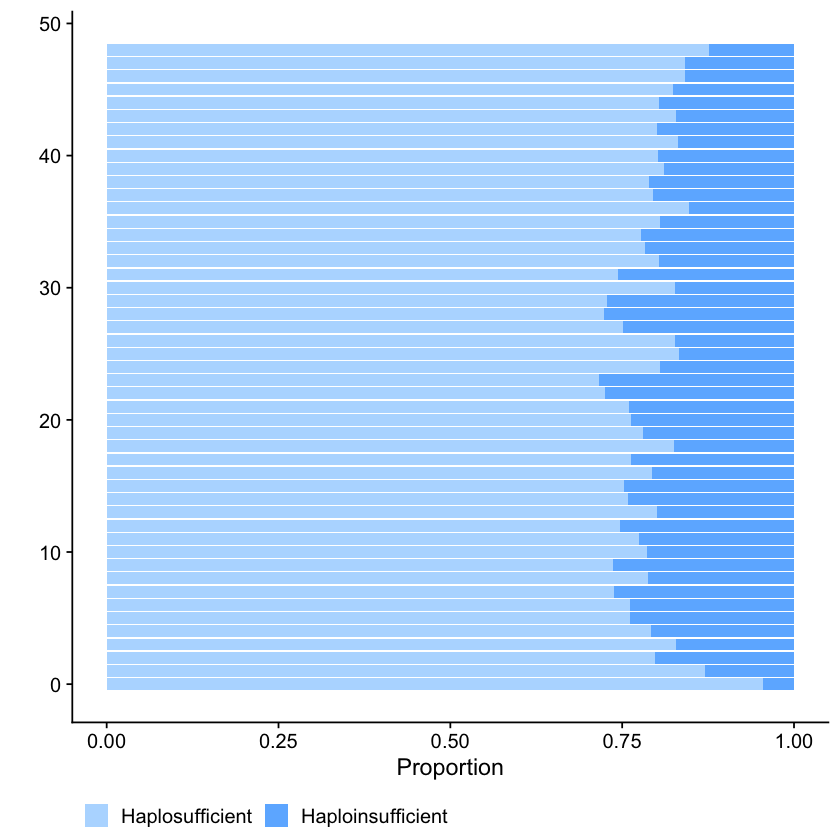

In [61]:
haplo_bar_metasoft <- ggplot(genesWitheQTLTissueCountMetasoft, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = haplo),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="") +
    scale_fill_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        breaks=c("N", "Y"),
        labels=c("Haplosufficient", "Haploinsufficient")) +
    theme(legend.position="bottom") + coord_flip()
haplo_bar_metasoft

### Proportion of tested tissues affected by eQTLs

#### Exclude genes without any eQTLs

If affected by eQTLs, what proportion of tissues affected

##### Bonferroni-corrected

In [62]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]

In [63]:
summary(genesWitheQTLTissueCountBonferroniWithoutZero)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:14326       Min.   : 1.000   Min.   : 1.00   
 1st Qu.: 3581   Class :character   1st Qu.: 2.000   1st Qu.:47.00   
 Median : 7162   Mode  :character   Median : 5.000   Median :48.00   
 Mean   : 7162                      Mean   : 9.377   Mean   :44.29   
 3rd Qu.:10744                      3rd Qu.:13.000   3rd Qu.:48.00   
 Max.   :14325                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   : 1.000   Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 1st Qu.: 4.000   1st Qu.: 31688522   1st Qu.: 31742671   1st Qu.:-1.000000  
 Median : 9.000   Median : 58634300   Median : 58753353   Median : 1.000000  
 Mean   : 9.804   Mean   : 74485243   Mean   : 74560972   Mean   : 0.003769  
 3rd Qu.:16.000   3rd Qu.:111133828   3rd Qu.:111211203   3rd Qu.: 1.000000  
 Max.   :22.000   Max.   :249144205   Max.

In [64]:
nrow(genesWitheQTLTissueCountBonferroniWithoutZero)

[1] 14326

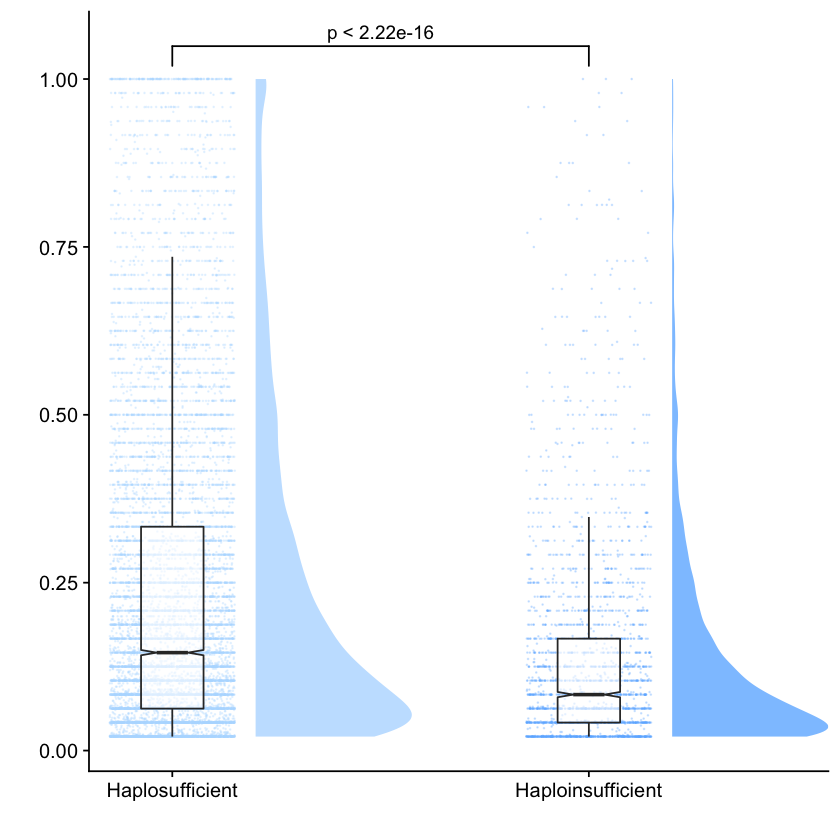

In [65]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]
haplo_raincloud_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroniWithoutZero, aes(haplo, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = haplo), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = haplo), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Haplosufficient", "Haploinsufficient"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplosufficient", "Haploinsufficient")) +
    scale_fill_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplosufficient", "Haploinsufficient")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
haplo_raincloud_bonferroni

In [95]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$haplo == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$haplo == 'N'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$haplo == "Y"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$haplo == "N"), ]$propOfExpressedAffectedByeQTL
W = 10612382, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [96]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.823176e-109

In [97]:
tapply(genesWitheQTLTissueCountBonferroniWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountBonferroniWithoutZero$haplo, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.06250 0.14583 0.23621 0.33333 1.00000 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.04167 0.08333 0.13838 0.16667 1.00000 


In [98]:
wilcoxonR(x = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$haplo == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$haplo == 'N'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$haplo == 'Y'),]$haplo,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$haplo == 'N'),]$haplo),
          ci = TRUE)

r     lower.ci upper.ci
1 0.186 0.17     0.202

##### Metasoft

In [99]:
genesWitheQTLTissueCountMetasoftWithoutZero <- genesWitheQTLTissueCountMetasoft[ which(genesWitheQTLTissueCountMetasoft$propOfExpressedAffectedByeQTL > 0),]

In [100]:
summary(genesWitheQTLTissueCountMetasoftWithoutZero)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:16214       Min.   : 1.00   Min.   : 2.00   
 1st Qu.: 4053   Class :character   1st Qu.:16.00   1st Qu.:47.00   
 Median : 8106   Mode  :character   Median :38.00   Median :48.00   
 Mean   : 8106                      Mean   :31.46   Mean   :44.15   
 3rd Qu.:12160                      3rd Qu.:48.00   3rd Qu.:48.00   
 Max.   :16213                      Max.   :48.00   Max.   :48.00   
 Chromosome.Name  Gene.Start..bp.     Gene.End..bp.           Strand         
 Min.   : 1.000   Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 1st Qu.: 4.000   1st Qu.: 31866018   1st Qu.: 31930884   1st Qu.:-1.000000  
 Median : 9.000   Median : 58435935   Median : 58504078   Median : 1.000000  
 Mean   : 9.808   Mean   : 74561212   Mean   : 74634008   Mean   : 0.004687  
 3rd Qu.:16.000   3rd Qu.:111111442   3rd Qu.:111179500   3rd Qu.: 1.000000  
 Max.   :22.000   Max.   :249200395   Max.   :249

In [101]:
nrow(genesWitheQTLTissueCountMetasoftWithoutZero)

[1] 16214

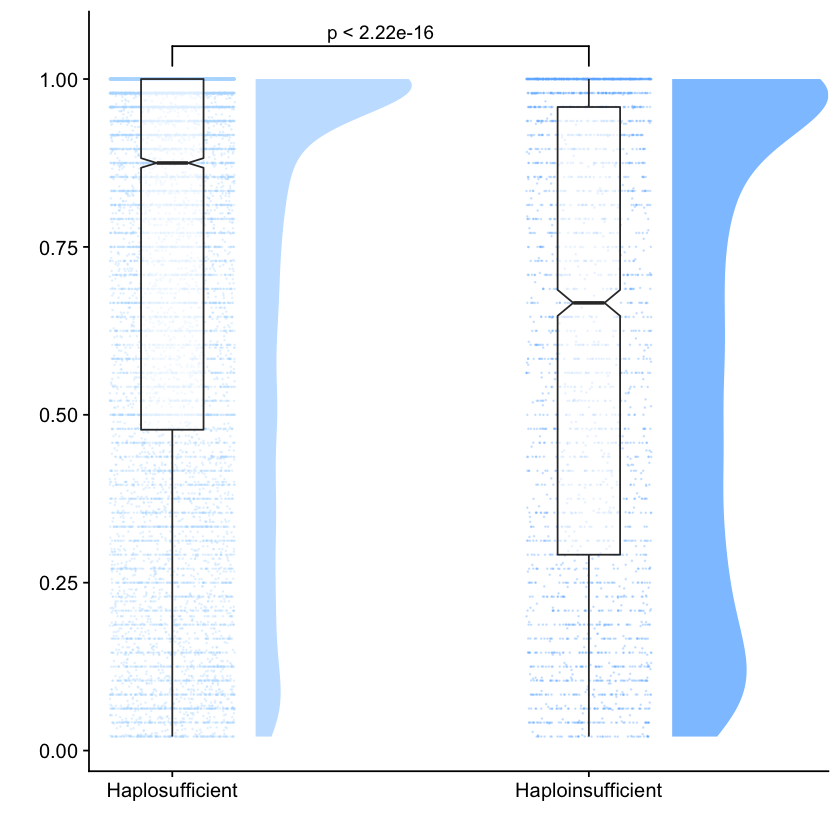

In [102]:
genesWitheQTLTissueCountMetasoftWithoutZero <- genesWitheQTLTissueCountMetasoft[ which(genesWitheQTLTissueCountMetasoft$propOfExpressedAffectedByeQTL > 0),]
haplo_raincloud_metasoft <- ggplot(genesWitheQTLTissueCountMetasoftWithoutZero, aes(haplo, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = haplo), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = haplo), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Haplosufficient", "Haploinsufficient"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplosufficient", "Haploinsufficient")) +
    scale_fill_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplosufficient", "Haploinsufficient")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
haplo_raincloud_metasoft

In [103]:
w <- wilcox.test(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$haplo == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$haplo == 'N'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$haplo == "Y"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$haplo == "N"), ]$propOfExpressedAffectedByeQTL
W = 15587665, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [104]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 2.2788e-68

In [105]:
tapply(genesWitheQTLTissueCountMetasoftWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountMetasoftWithoutZero$haplo, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.47777 0.87500 0.71971 1.00000 1.00000 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.29167 0.66667 0.61012 0.95833 1.00000 


In [106]:
wilcoxonR(x = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$haplo == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$haplo == 'N'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$haplo == 'Y'),]$haplo,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$haplo == 'N'),]$haplo),
          ci = TRUE)

r     lower.ci upper.ci
1 0.138 0.124    0.153

## Copy number conserved genes

### Proportion for number of tissues affected by eQTLs

##### Bonferroni-corrected

In [111]:
genesWitheQTLTissueCountBonferroni <- read.csv("../../outputFiles/genesWitheQTLTissueCountBonferroniAndCCNStatus.csv", sep="\t")
summary(genesWitheQTLTissueCountBonferroni)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:18402       Min.   : 0.000   Min.   : 1.00   
 1st Qu.: 4600   Class :character   1st Qu.: 1.000   1st Qu.:46.00   
 Median : 9200   Mode  :character   Median : 4.000   Median :48.00   
 Mean   : 9200                      Mean   : 7.753   Mean   :42.07   
 3rd Qu.:13801                      3rd Qu.:10.000   3rd Qu.:48.00   
 Max.   :18401                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand         
 Length:18402       Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 Class :character   1st Qu.: 31731036   1st Qu.: 31788800   1st Qu.:-1.000000  
 Mode  :character   Median : 58261514   Median : 58338500   Median : 1.000000  
                    Mean   : 74435114   Mean   : 74504737   Mean   : 0.008912  
                    3rd Qu.:111309615   3rd Qu.:111371553   3rd Qu.: 1.000000  
                    Max.   :24

In [112]:
genesWitheQTLTissueCountBonferroni$affected <- 'N'
genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$affectedTissues > 0),]$affected <- 'Y'

In [113]:
summary(genesWitheQTLTissueCountBonferroni)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:18402       Min.   : 0.000   Min.   : 1.00   
 1st Qu.: 4600   Class :character   1st Qu.: 1.000   1st Qu.:46.00   
 Median : 9200   Mode  :character   Median : 4.000   Median :48.00   
 Mean   : 9200                      Mean   : 7.753   Mean   :42.07   
 3rd Qu.:13801                      3rd Qu.:10.000   3rd Qu.:48.00   
 Max.   :18401                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand         
 Length:18402       Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 Class :character   1st Qu.: 31731036   1st Qu.: 31788800   1st Qu.:-1.000000  
 Mode  :character   Median : 58261514   Median : 58338500   Median : 1.000000  
                    Mean   : 74435114   Mean   : 74504737   Mean   : 0.008912  
                    3rd Qu.:111309615   3rd Qu.:111371553   3rd Qu.: 1.000000  
                    Max.   :24

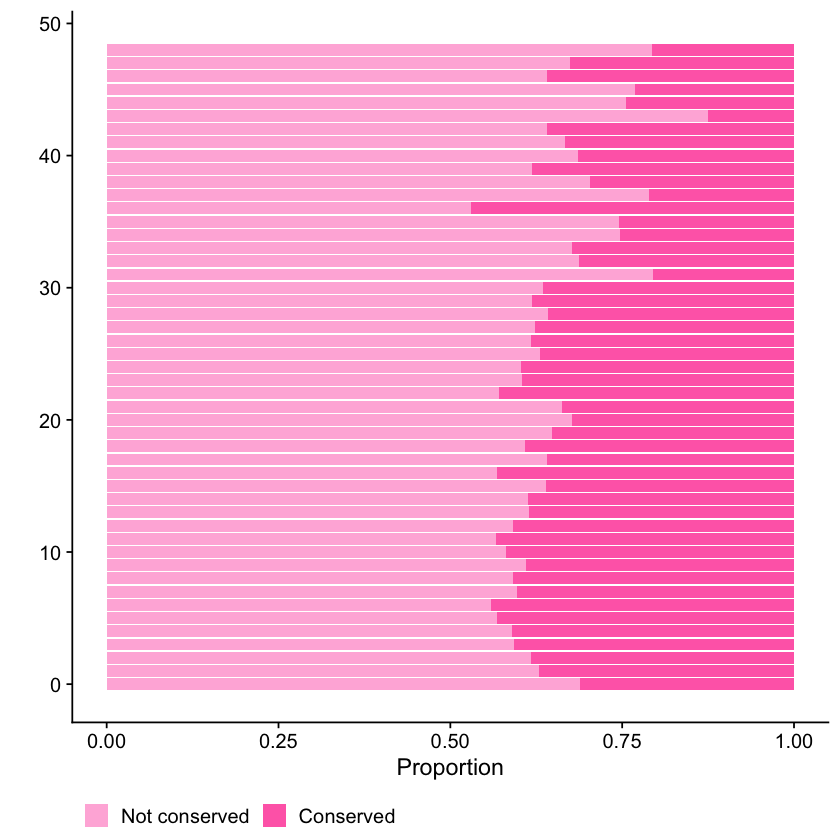

In [114]:
ccn_bar_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroni, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = CCN),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="") +
    scale_fill_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        breaks=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    theme(legend.position="bottom") + coord_flip()
ccn_bar_bonferroni

##### Metasoft

In [71]:
genesWitheQTLTissueCountMetasoft <- read.csv("../../outputFiles/genesWitheQTLTissueCountMetasoftAndCCNStatus.csv", sep="\t")
summary(genesWitheQTLTissueCountMetasoft)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:18402       Min.   : 0.00   Min.   : 1.00   
 1st Qu.: 4600   Class :character   1st Qu.:11.00   1st Qu.:46.00   
 Median : 9200   Mode  :character   Median :35.00   Median :48.00   
 Mean   : 9200                      Mean   :29.41   Mean   :42.07   
 3rd Qu.:13801                      3rd Qu.:47.00   3rd Qu.:48.00   
 Max.   :18401                      Max.   :48.00   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand         
 Length:18402       Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 Class :character   1st Qu.: 31731036   1st Qu.: 31788800   1st Qu.:-1.000000  
 Mode  :character   Median : 58261514   Median : 58338500   Median : 1.000000  
                    Mean   : 74435114   Mean   : 74504737   Mean   : 0.008912  
                    3rd Qu.:111309615   3rd Qu.:111371553   3rd Qu.: 1.000000  
                    Max.   :249200395

In [72]:
summary(genesWitheQTLTissueCountMetasoft)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:18402       Min.   : 0.00   Min.   : 1.00   
 1st Qu.: 4600   Class :character   1st Qu.:11.00   1st Qu.:46.00   
 Median : 9200   Mode  :character   Median :35.00   Median :48.00   
 Mean   : 9200                      Mean   :29.41   Mean   :42.07   
 3rd Qu.:13801                      3rd Qu.:47.00   3rd Qu.:48.00   
 Max.   :18401                      Max.   :48.00   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand         
 Length:18402       Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 Class :character   1st Qu.: 31731036   1st Qu.: 31788800   1st Qu.:-1.000000  
 Mode  :character   Median : 58261514   Median : 58338500   Median : 1.000000  
                    Mean   : 74435114   Mean   : 74504737   Mean   : 0.008912  
                    3rd Qu.:111309615   3rd Qu.:111371553   3rd Qu.: 1.000000  
                    Max.   :249200395

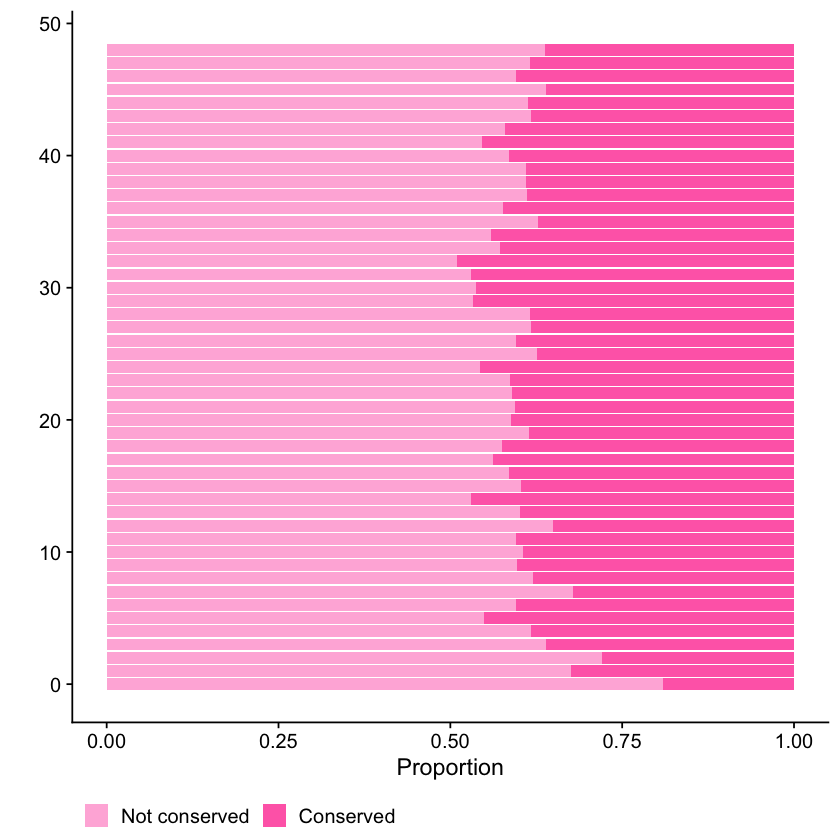

In [73]:
ccn_bar_metasoft <- ggplot(genesWitheQTLTissueCountMetasoft, aes(affectedTissues)) +
    theme_cowplot() +
    geom_bar(aes(fill = CCN),position = position_fill(reverse = TRUE)) +
    scale_y_continuous(name="Proportion") +
    scale_x_continuous(name="") +
    scale_fill_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        breaks=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    theme(legend.position="bottom") + coord_flip()
ccn_bar_metasoft

### Proportion of tested tissues affected by eQTLs

#### Exclude genes without any eQTLs

If affected by eQTLs, what proportion of tissues affected

##### Bonferroni-corrected

In [74]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]

In [75]:
summary(genesWitheQTLTissueCountBonferroniWithoutZero)

       X         Ensembl.Gene.ID    affectedTissues  expressedTissues
 Min.   :    0   Length:15338       Min.   : 1.000   Min.   : 1.00   
 1st Qu.: 3834   Class :character   1st Qu.: 2.000   1st Qu.:47.00   
 Median : 7668   Mode  :character   Median : 5.000   Median :48.00   
 Mean   : 7668                      Mean   : 9.302   Mean   :44.04   
 3rd Qu.:11503                      3rd Qu.:12.000   3rd Qu.:48.00   
 Max.   :15337                      Max.   :48.000   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand         
 Length:15338       Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 Class :character   1st Qu.: 31610933   1st Qu.: 31683512   1st Qu.:-1.000000  
 Mode  :character   Median : 58702930   Median : 58847152   Median : 1.000000  
                    Mean   : 74406920   Mean   : 74482101   Mean   : 0.007172  
                    3rd Qu.:111256655   3rd Qu.:111323339   3rd Qu.: 1.000000  
                    Max.   :24

In [76]:
nrow(genesWitheQTLTissueCountBonferroniWithoutZero)

[1] 15338

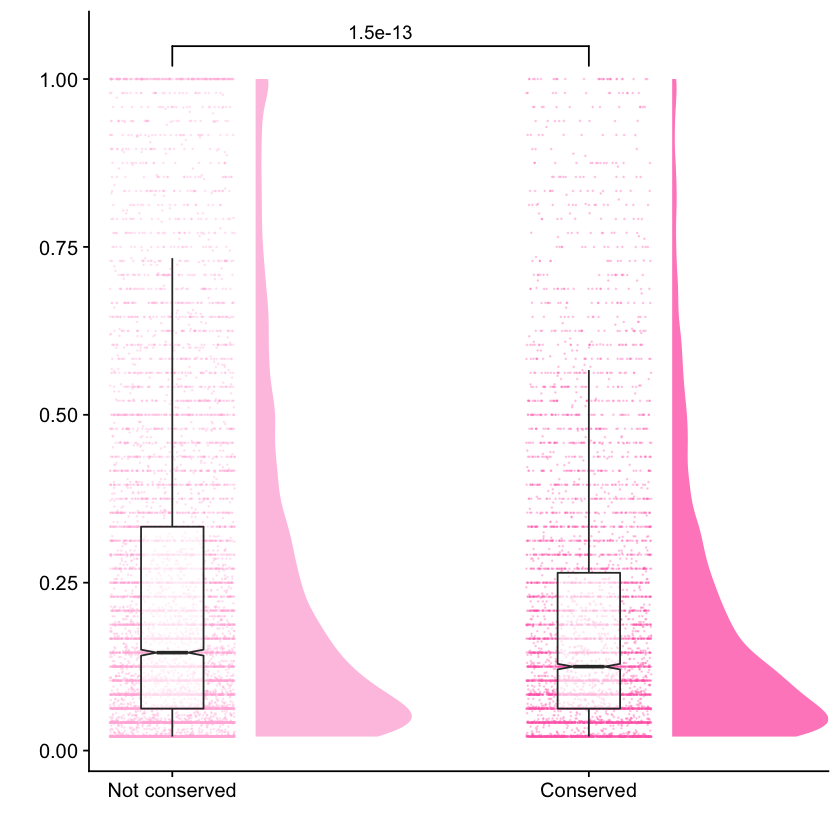

In [77]:
genesWitheQTLTissueCountBonferroniWithoutZero <- genesWitheQTLTissueCountBonferroni[ which(genesWitheQTLTissueCountBonferroni$propOfExpressedAffectedByeQTL > 0),]
ccn_raincloud_bonferroni <- ggplot(genesWitheQTLTissueCountBonferroniWithoutZero, aes(CCN, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CCN), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CCN), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Not conserved", "Conserved"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    scale_fill_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
ccn_raincloud_bonferroni

In [118]:
w <- wilcox.test(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CCN == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CCN == 'N'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$CCN == "Y"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountBonferroniWithoutZero[which(genesWitheQTLTissueCountBonferroniWithoutZero$CCN == "N"), ]$propOfExpressedAffectedByeQTL
W = 26002006, p-value = 1.509e-13
alternative hypothesis: true location shift is not equal to 0


In [119]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 2.112966e-12

In [120]:
tapply(genesWitheQTLTissueCountBonferroniWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountBonferroniWithoutZero$CCN, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.06250 0.14583 0.23554 0.33333 1.00000 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.06250 0.12500 0.19654 0.26471 1.00000 


In [121]:
wilcoxonR(x = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CCN == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CCN == 'N'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CCN == 'Y'),]$CCN,
                genesWitheQTLTissueCountBonferroniWithoutZero[ which(genesWitheQTLTissueCountBonferroniWithoutZero$CCN == 'N'),]$CCN),
          ci = TRUE)

r      lower.ci upper.ci
1 0.0597 0.0446   0.0744

##### Metasoft

In [122]:
genesWitheQTLTissueCountMetasoftWithoutZero <- genesWitheQTLTissueCountMetasoft[ which(genesWitheQTLTissueCountMetasoft$propOfExpressedAffectedByeQTL > 0),]

In [123]:
summary(genesWitheQTLTissueCountMetasoftWithoutZero)

       X         Ensembl.Gene.ID    affectedTissues expressedTissues
 Min.   :    0   Length:17395       Min.   : 1.00   Min.   : 2.00   
 1st Qu.: 4348   Class :character   1st Qu.:15.00   1st Qu.:47.00   
 Median : 8697   Mode  :character   Median :37.00   Median :48.00   
 Mean   : 8697                      Mean   :31.11   Mean   :43.95   
 3rd Qu.:13046                      3rd Qu.:47.00   3rd Qu.:48.00   
 Max.   :17394                      Max.   :48.00   Max.   :48.00   
 Chromosome.Name    Gene.Start..bp.     Gene.End..bp.           Strand         
 Length:17395       Min.   :     5810   Min.   :    31427   Min.   :-1.000000  
 Class :character   1st Qu.: 31824754   1st Qu.: 31916655   1st Qu.:-1.000000  
 Mode  :character   Median : 58553855   Median : 58666477   Median : 1.000000  
                    Mean   : 74458501   Mean   : 74530889   Mean   : 0.008796  
                    3rd Qu.:110996070   3rd Qu.:111139958   3rd Qu.: 1.000000  
                    Max.   :249200395

In [124]:
nrow(genesWitheQTLTissueCountMetasoftWithoutZero)

[1] 17395

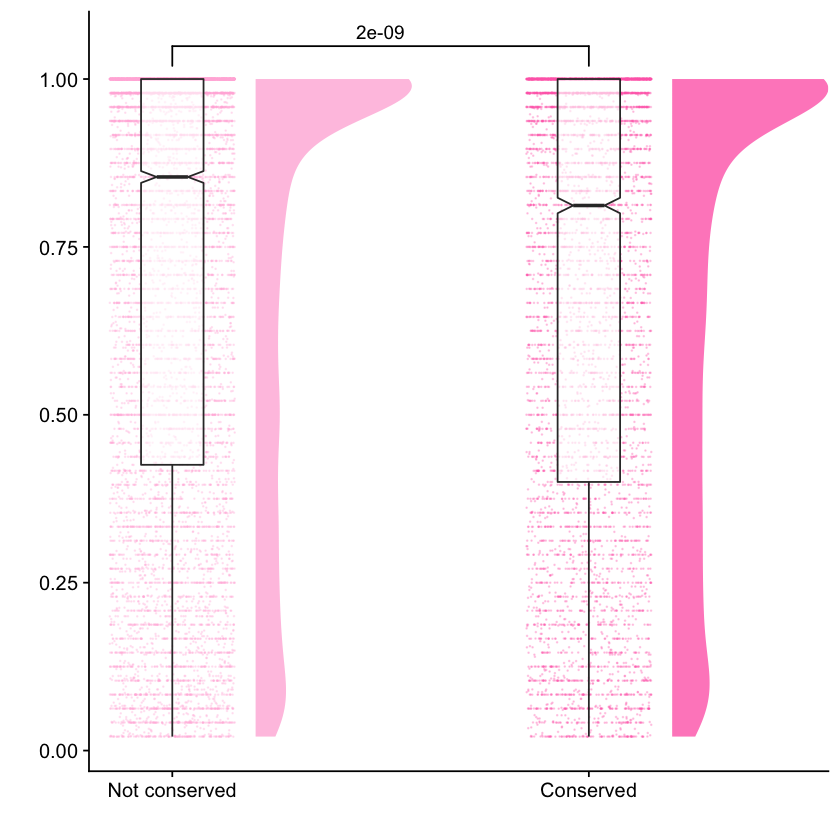

In [125]:
genesWitheQTLTissueCountMetasoftWithoutZero <- genesWitheQTLTissueCountMetasoft[ which(genesWitheQTLTissueCountMetasoft$propOfExpressedAffectedByeQTL > 0),]
ccn_raincloud_metasoft <- ggplot(genesWitheQTLTissueCountMetasoftWithoutZero, aes(CCN, propOfExpressedAffectedByeQTL)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CCN), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CCN), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05))) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Not conserved", "Conserved"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    scale_fill_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
ccn_raincloud_metasoft

In [126]:
w <- wilcox.test(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CCN == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CCN == 'N'),]$propOfExpressedAffectedByeQTL) 
w


	Wilcoxon rank sum test with continuity correction

data:  genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$CCN == "Y"), ]$propOfExpressedAffectedByeQTL and genesWitheQTLTissueCountMetasoftWithoutZero[which(genesWitheQTLTissueCountMetasoftWithoutZero$CCN == "N"), ]$propOfExpressedAffectedByeQTL
W = 33995704, p-value = 1.967e-09
alternative hypothesis: true location shift is not equal to 0


In [127]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 2.753344e-08

In [128]:
tapply(genesWitheQTLTissueCountMetasoftWithoutZero$propOfExpressedAffectedByeQTL, genesWitheQTLTissueCountMetasoftWithoutZero$CCN, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.42553 0.85417 0.70278 1.00000 1.00000 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02083 0.40000 0.81166 0.68163 1.00000 1.00000 


In [129]:
wilcoxonR(x = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CCN == 'Y'),]$propOfExpressedAffectedByeQTL,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CCN == 'N'),]$propOfExpressedAffectedByeQTL),
          g = c(genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CCN == 'Y'),]$CCN,
                genesWitheQTLTissueCountMetasoftWithoutZero[ which(genesWitheQTLTissueCountMetasoftWithoutZero$CCN == 'N'),]$CCN),
          ci = TRUE)

r      lower.ci upper.ci
1 0.0455 0.0321   0.0599

## Plot figures

In [130]:
p1 <- (exac_bar_bonferroni + zarrei_bar_bonferroni + ohno_bar_bonferroni + haplo_bar_bonferroni + ccn_bar_bonferroni) + plot_layout(ncol = 5, nrow=1)
p2 <- (exac_raincloud_bonferroni + zarrei_raincloud_bonferroni + ohno_raincloud_bonferroni + haplo_raincloud_bonferroni + ccn_raincloud_bonferroni) + plot_layout(ncol = 5, nrow=1)
p <- (p1 / p2)

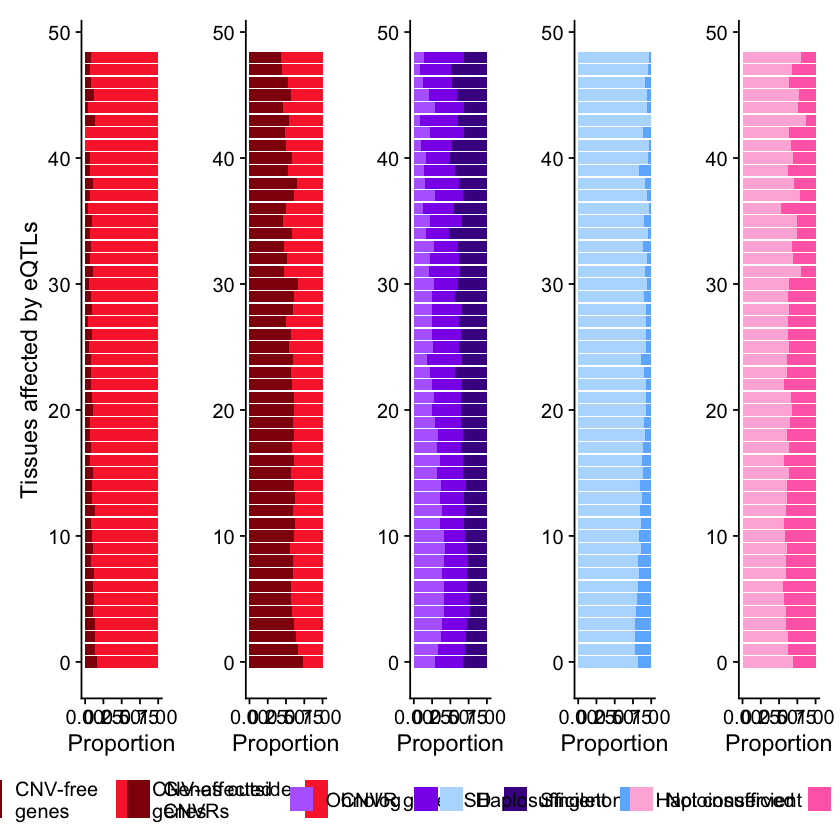

In [131]:
p1

In [142]:
ggsave('../../outputFiles/figures/propTissuesAffectedByeQTLsGeneGroupsBarchart.svg', width=40, height=14, units="cm")

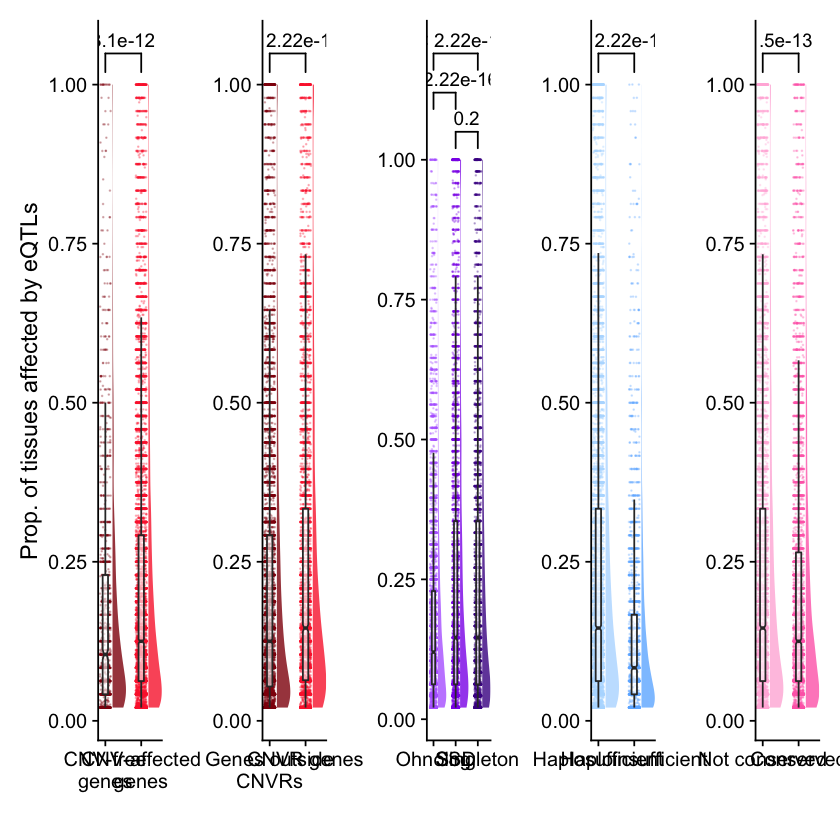

In [132]:
p2

In [144]:
ggsave('../../outputFiles/figures/propTissuesAffectedByeQTLsGeneGroupsRainbowPlot.svg', width=40, height=14, units="cm")

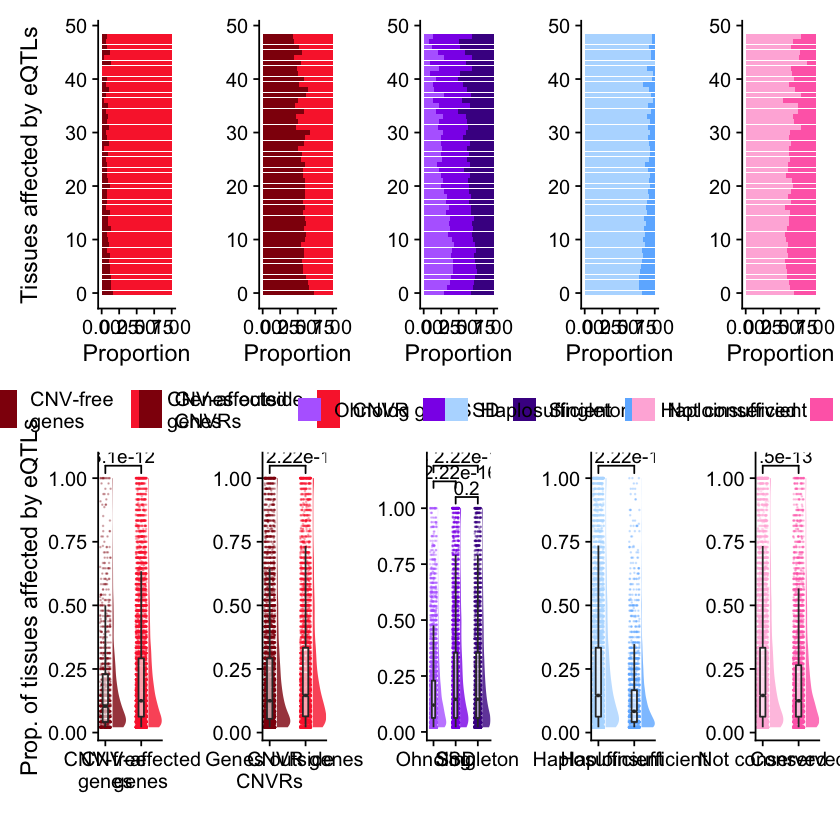

In [133]:
p

In [146]:
ggsave('../../outputFiles/figures/propTissuesAffectedByeQTLsGeneGroupsRaincloudPlot.svg', width=40, height=28, units="cm")

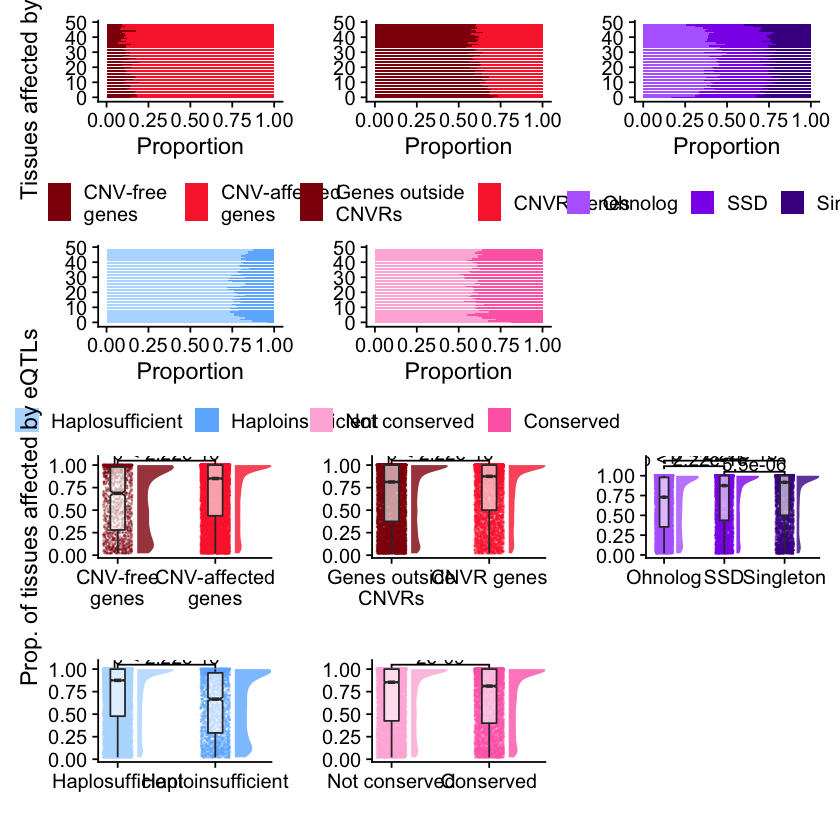

In [134]:
(exac_bar_metasoft + zarrei_bar_metasoft + ohno_bar_metasoft + haplo_bar_metasoft + ccn_bar_metasoft) /
(exac_raincloud_metasoft + zarrei_raincloud_metasoft + ohno_raincloud_metasoft + haplo_raincloud_metasoft + ccn_raincloud_metasoft) + 
  plot_layout(widths = c(5, 2))

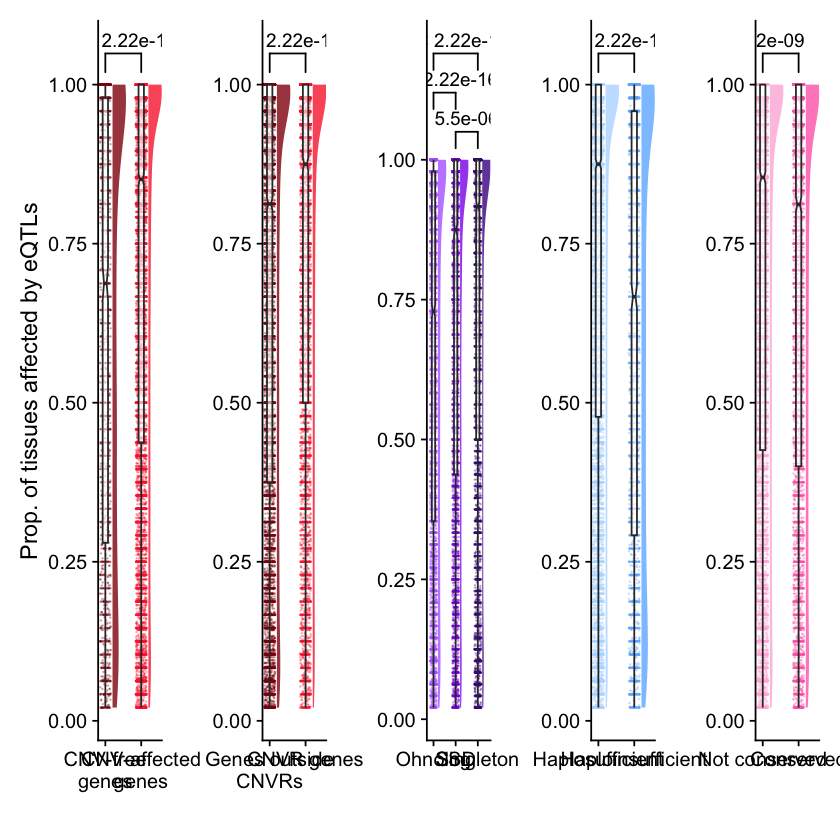

In [140]:
(exac_raincloud_metasoft | zarrei_raincloud_metasoft | ohno_raincloud_metasoft | haplo_raincloud_metasoft | ccn_raincloud_metasoft)

In [141]:
ggsave('../../outputFiles/figures/propTissuesAffectedByeQTLsGeneGroupsRaincloudPlotMetasoft.png', width=40, height=15, units="cm")